In [57]:
import gc
import os
import torch.nn.functional as F
import torch
import numpy as np
from tqdm import tqdm
import pickle

In [67]:
gc.collect()

16025

In [68]:
location_feat = "E:/FYP_Data/Pose3D/individual_files"

In [69]:
extracted = {}

In [70]:
for file in tqdm(os.listdir(location_feat)):
    file_id = file.split(".")[0]
    data = np.load(os.path.join(location_feat,file))
    label = data["label"]
    output = data["output"].flatten()
    layer3 = data["layer3"]
    dropout = np.mean(data["dropout"],axis=0)

    layer3 = F.avg_pool3d(torch.from_numpy(layer3),(3,3,3))
    layer3 = torch.mean(layer3,dim=0)
    layer3 = F.max_pool3d(torch.transpose(layer3,0,-1),(2,2,2))
    layer3 = layer3.flatten().numpy()

    try:
        extracted[label.item()].append({
            "file_id":file_id,
            "output":output,
            "layer3":layer3,
            "dropout":dropout
        })

    except KeyError:
        extracted[label.item()] = [{
            "file_id":file_id,
            "output":output,
            "layer3":layer3,
            "dropout":dropout
        }]

    gc.collect()

100%|██████████| 173/173 [05:25<00:00,  1.88s/it]


In [77]:
data.files

['label', 'output', 'layer3', 'dropout']

In [78]:
with open("E:/FYP_Data/Pose3D/extracted_feat.pkl","wb") as f0:
    pickle.dump(extracted,f0)

In [79]:
output_array,layer3_array,dropout_array,label_array,file_id_array = [],[],[],[],[]

for lab,val in extracted.items():
    for __item in val:
        label_array.append(lab)
        output_array.append(__item["output"])
        layer3_array.append(__item["layer3"])
        dropout_array.append(__item["dropout"])
        file_id_array.append(__item["file_id"])

output_array,layer3_array,dropout_array,label_array,file_id_array = np.asarray(output_array),np.asarray(layer3_array),np.asarray(dropout_array),np.asarray(label_array),np.asarray(file_id_array)

In [80]:
np.savez("E:/FYP_Data/Pose3D/extracted_feat.npz",output=output_array,layer3=layer3_array,dropout=dropout_array,label=label_array)

## Visualization

In [81]:
import hypertools as hyp
import pandas as pd
import re
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import cv2
import json

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

In [82]:
import random

def draw_heatmaps(arr_list,nrows=2,ncols=2):
    ran_list = random.sample(arr_list,ncols*nrows)
    fig, ax = plt.subplots(nrows=nrows,ncols=ncols, sharex=True)
    for i in range(nrows):
        for j in range(ncols):
            #print(i*ncols+j,len(ran_list))
            ax[i,j].imshow(ran_list[i*ncols+j].detach().cpu().numpy()[np.newaxis,:], cmap="plasma", aspect="auto")

    plt.tight_layout()
    plt.show()

### All array of feat

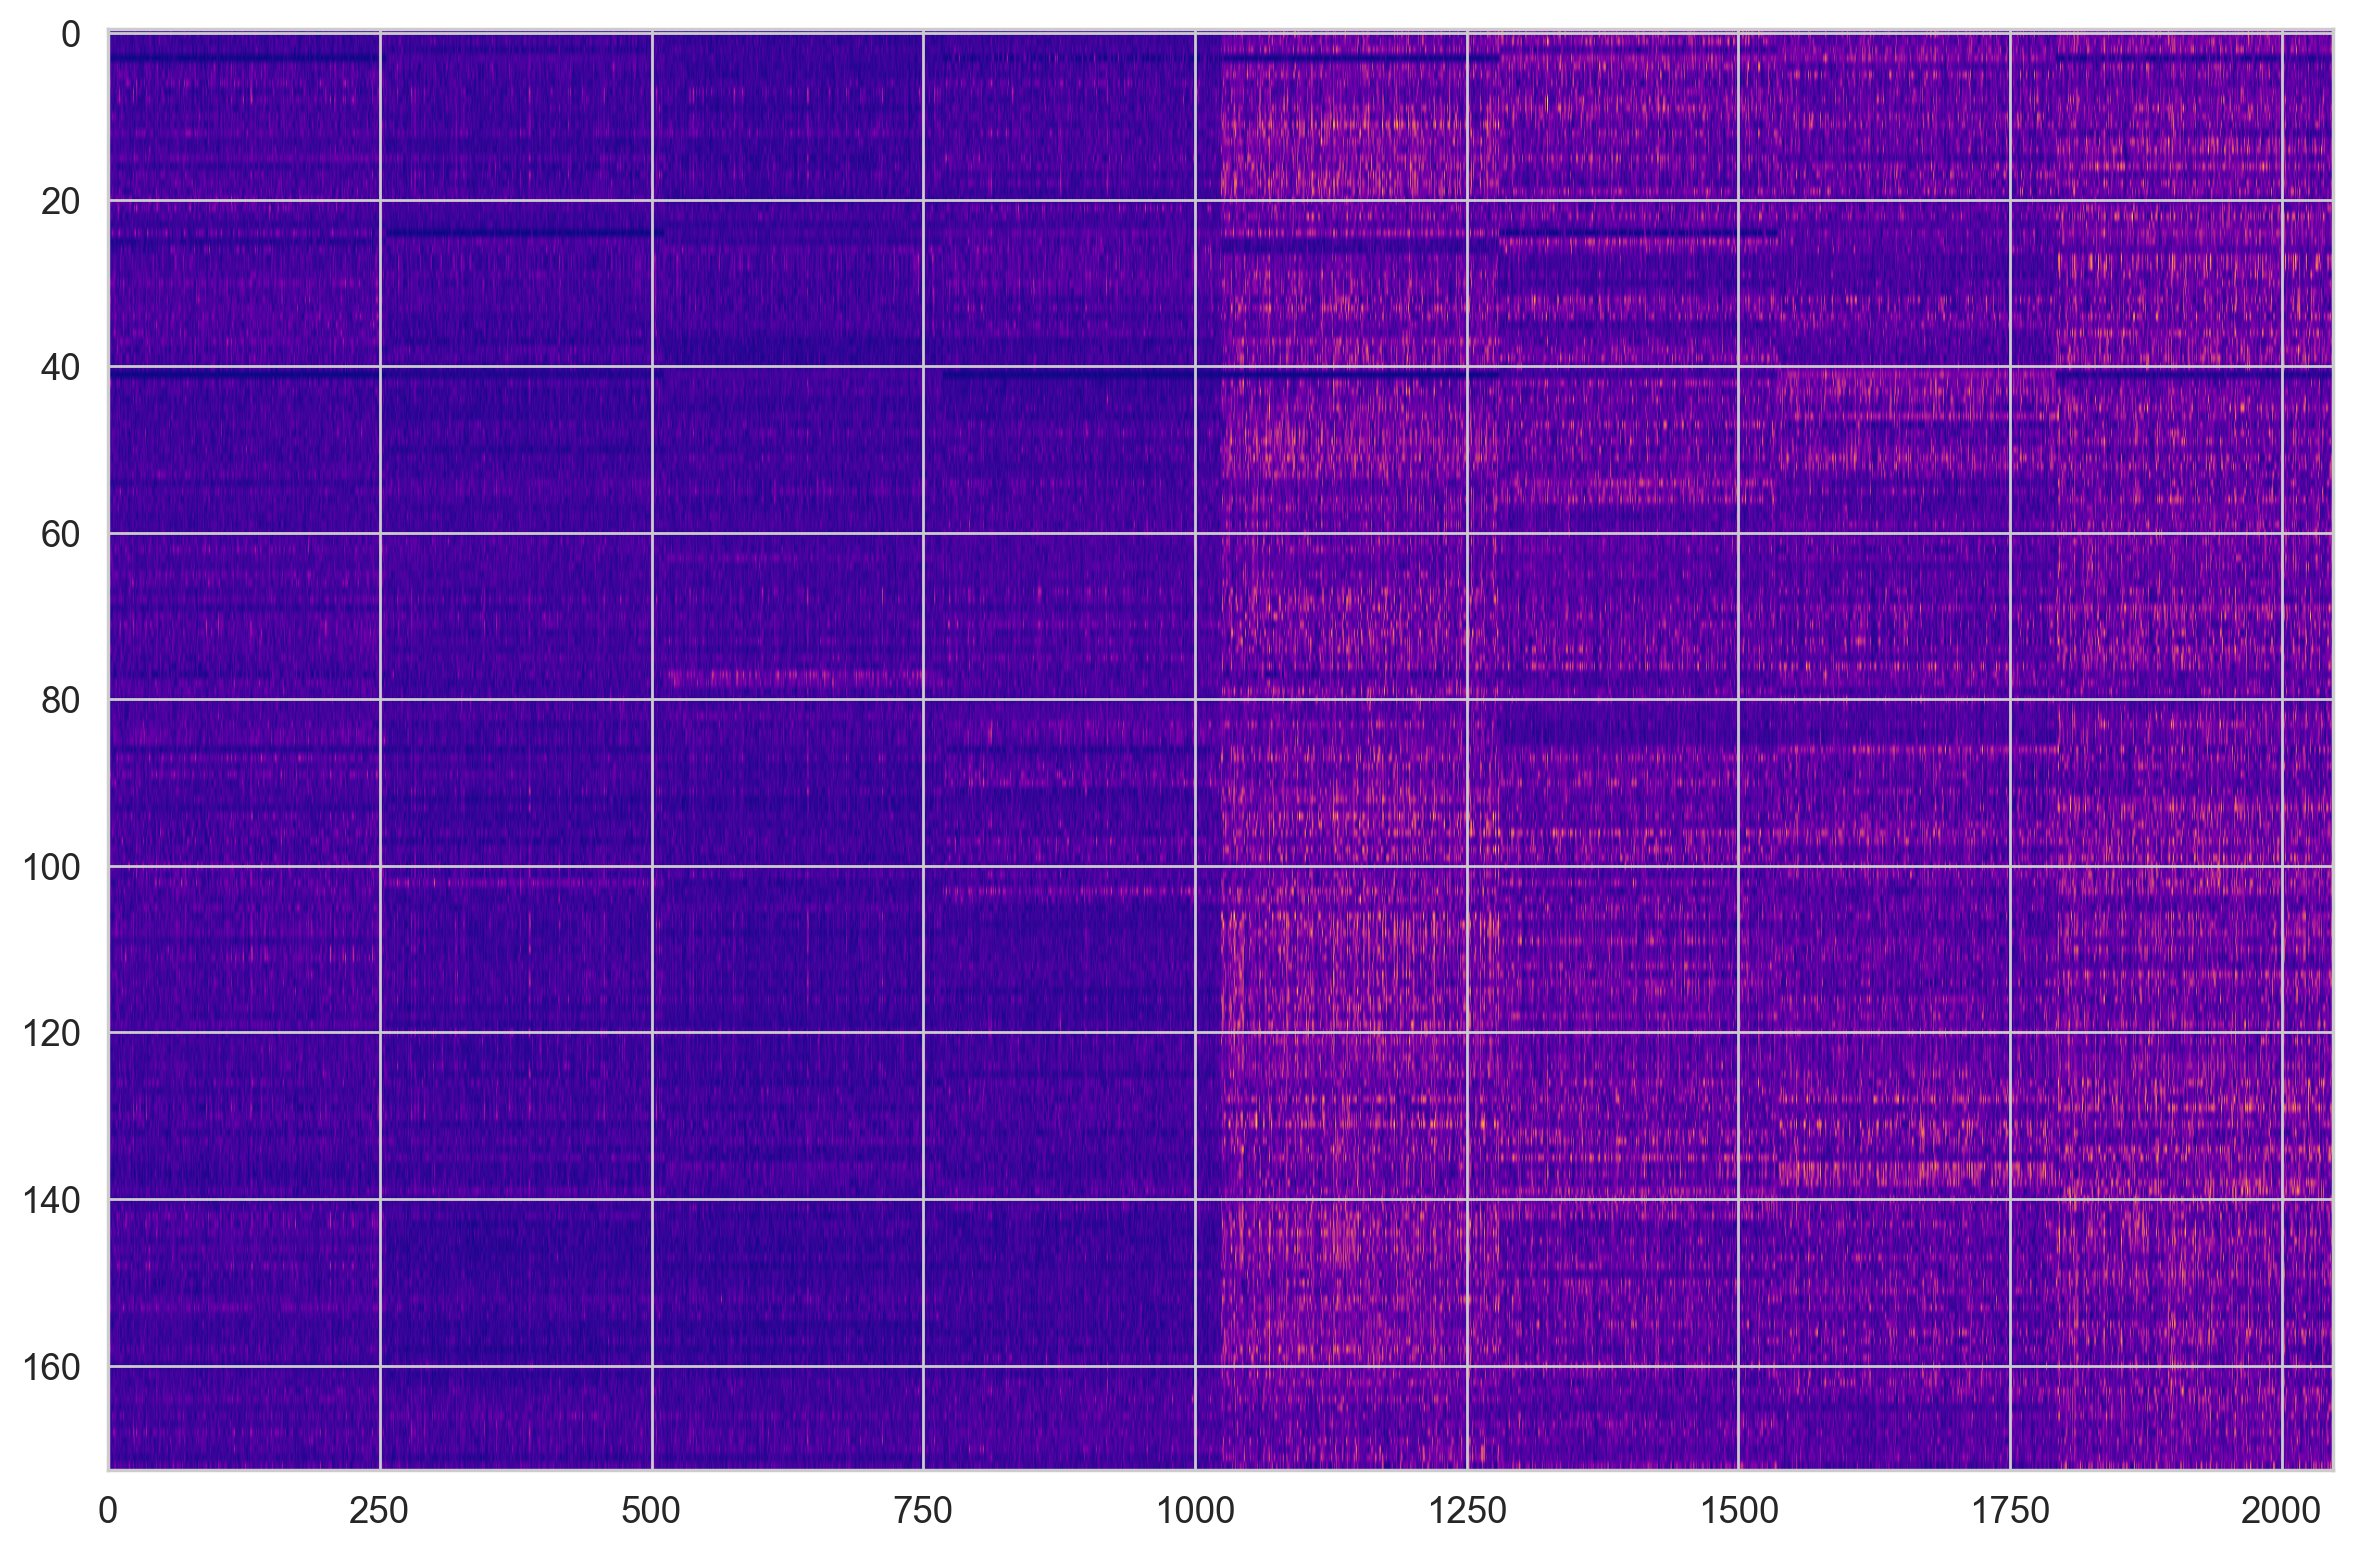

In [83]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(layer3_array, cmap="plasma", aspect="auto")

plt.tight_layout()
plt.show()

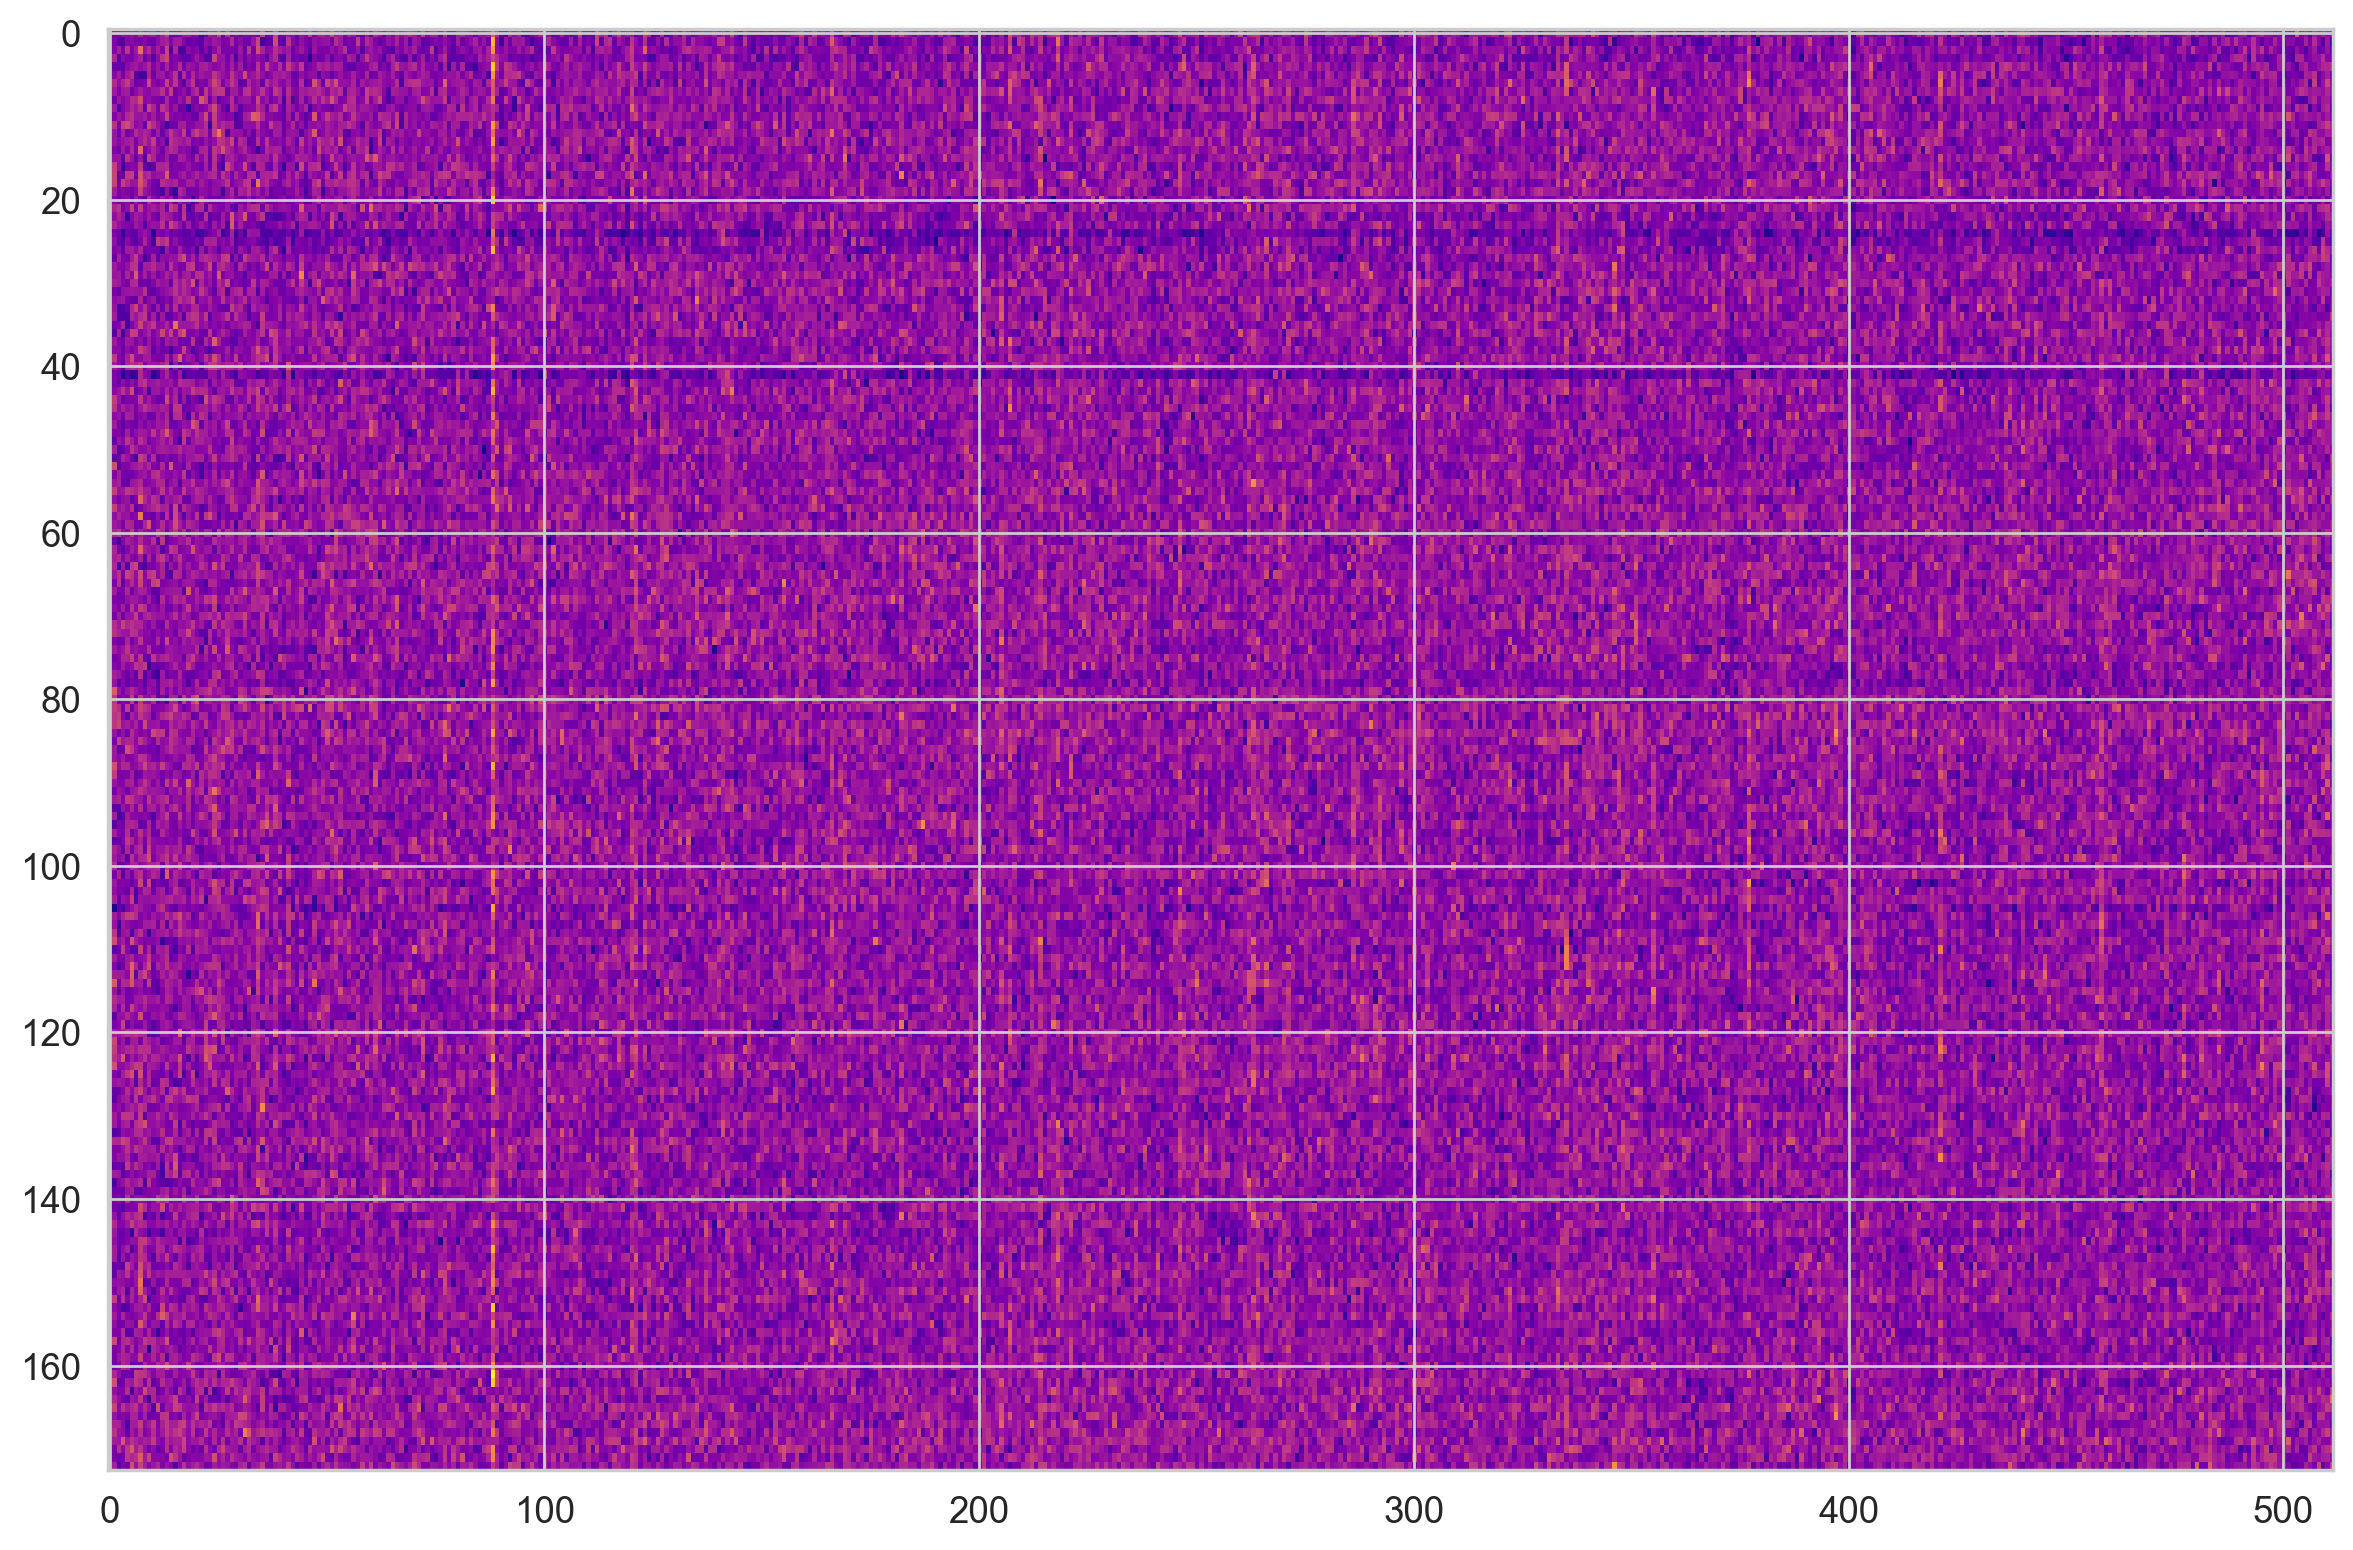

In [84]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(dropout_array, cmap="plasma", aspect="auto")

plt.tight_layout()
plt.show()

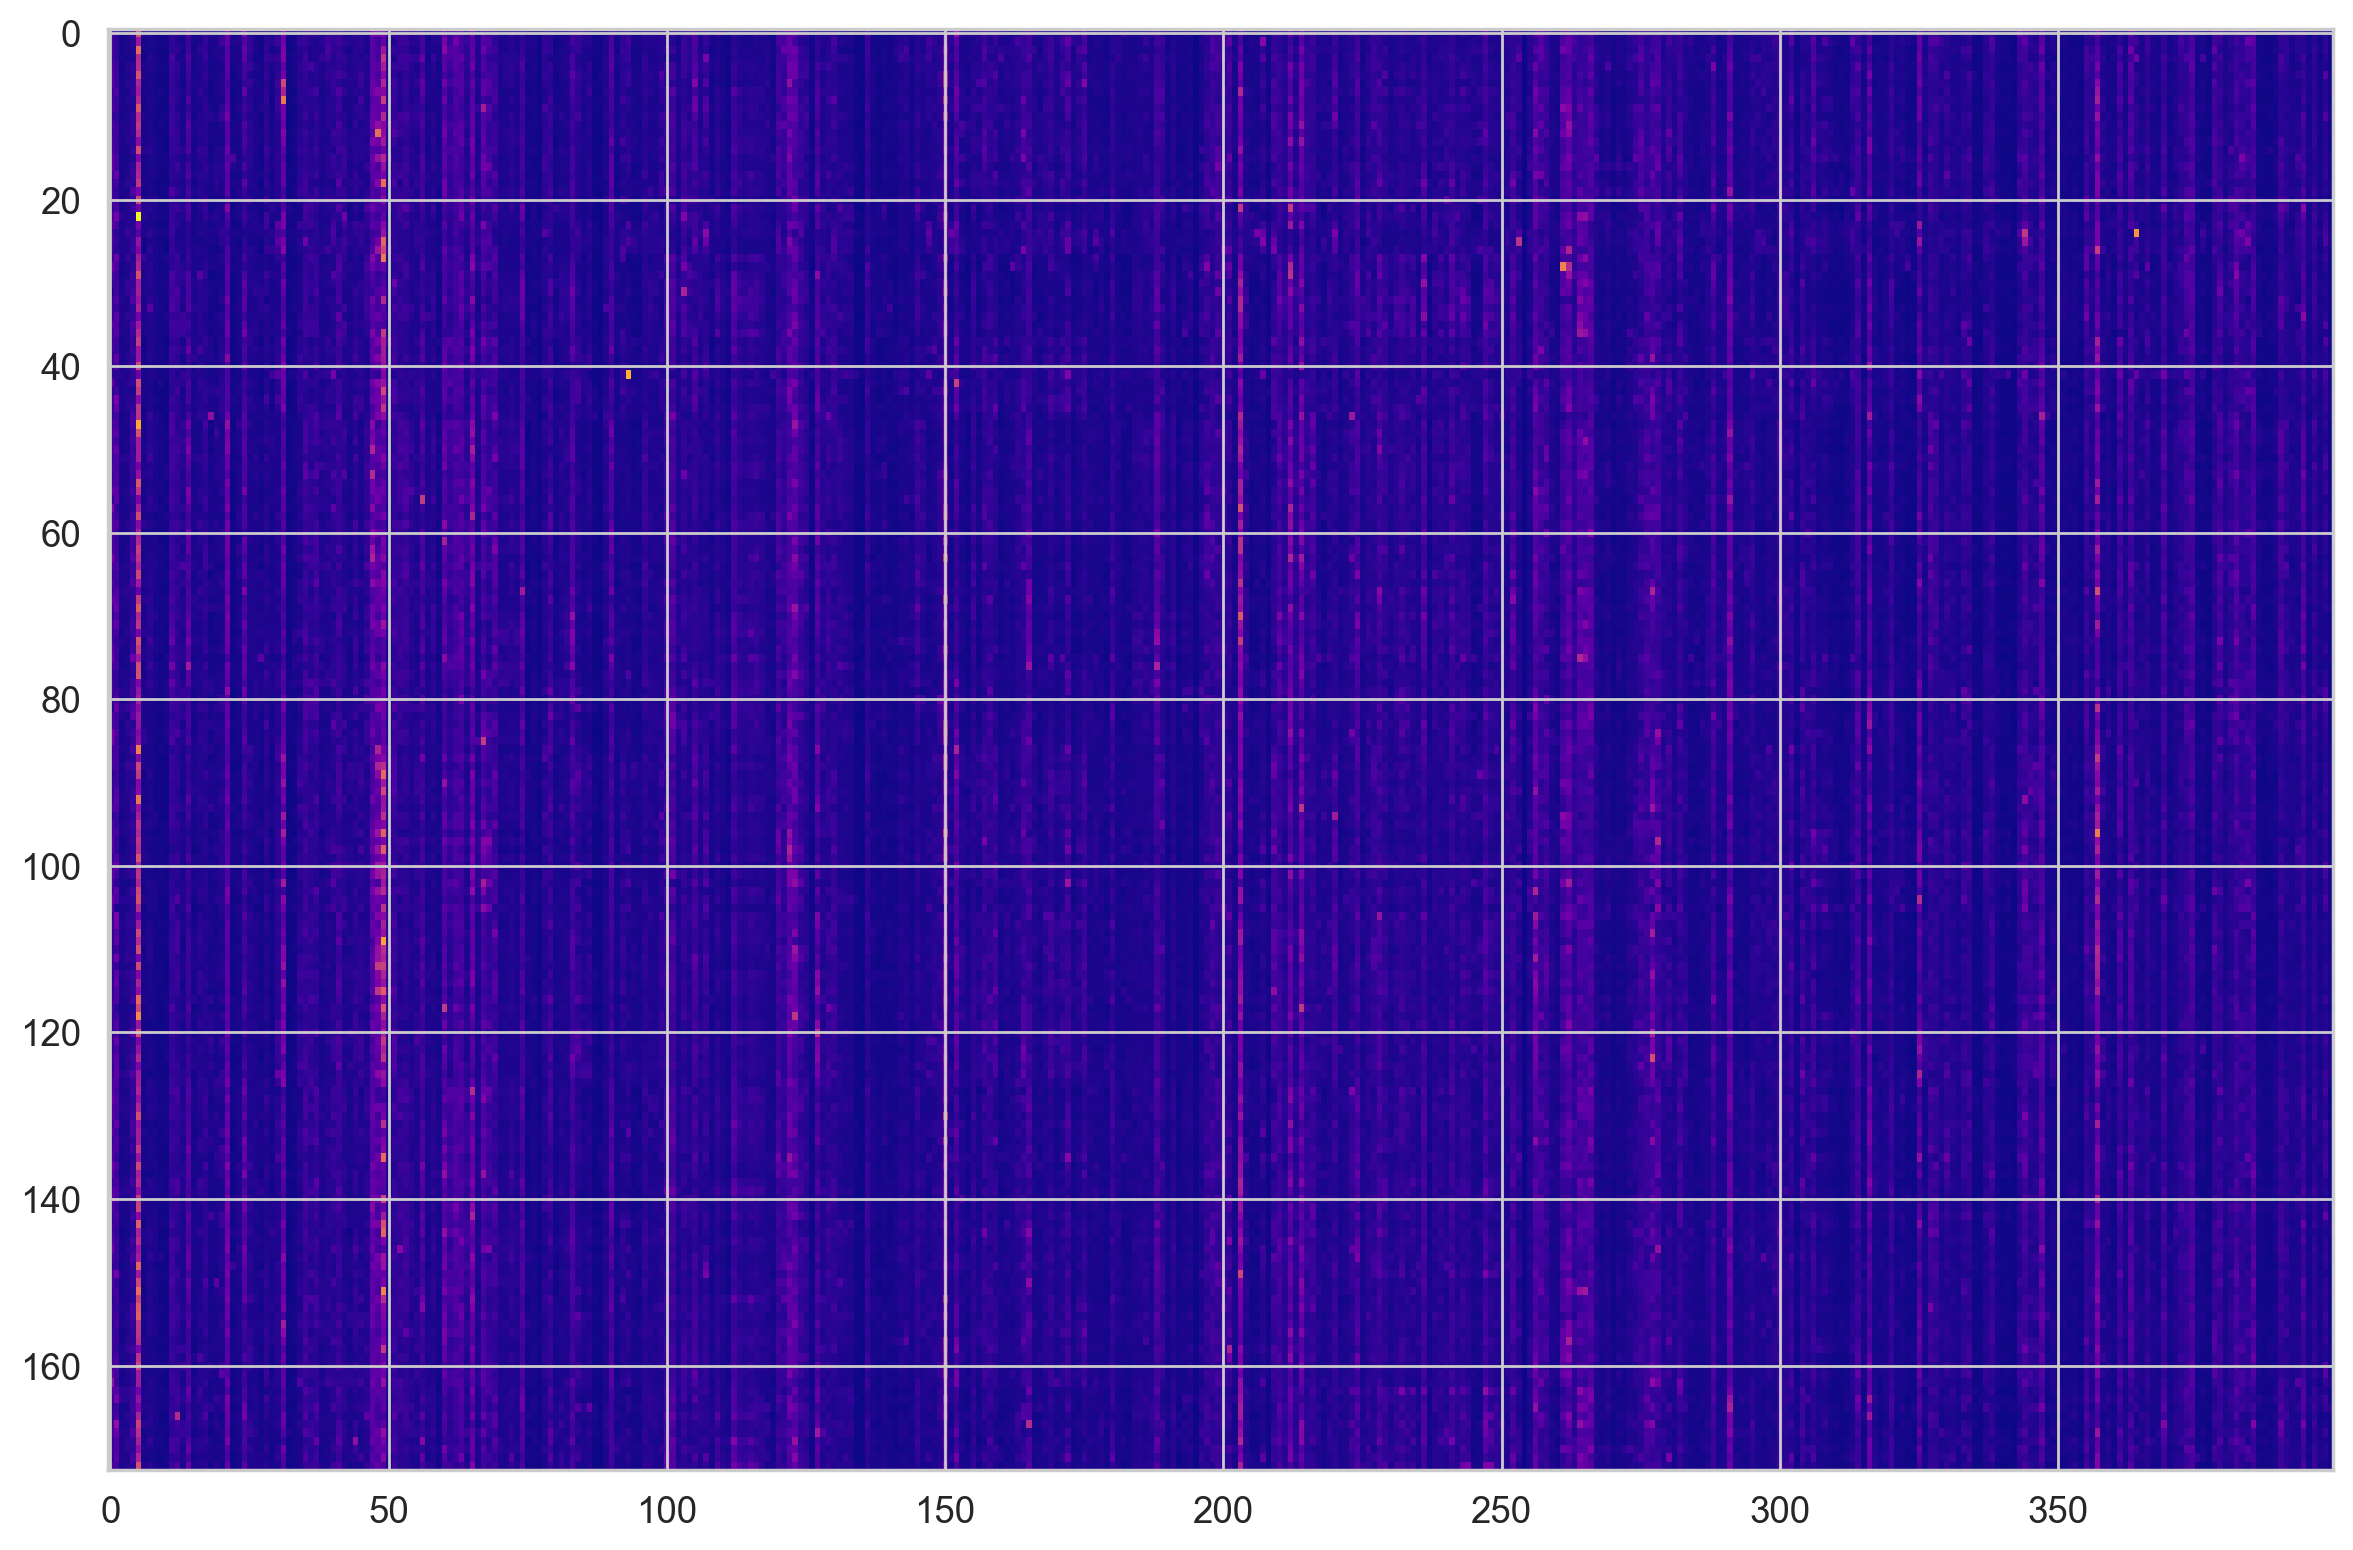

In [85]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(output_array, cmap="plasma", aspect="auto")

plt.tight_layout()
plt.show()

### Single Array Layer 3

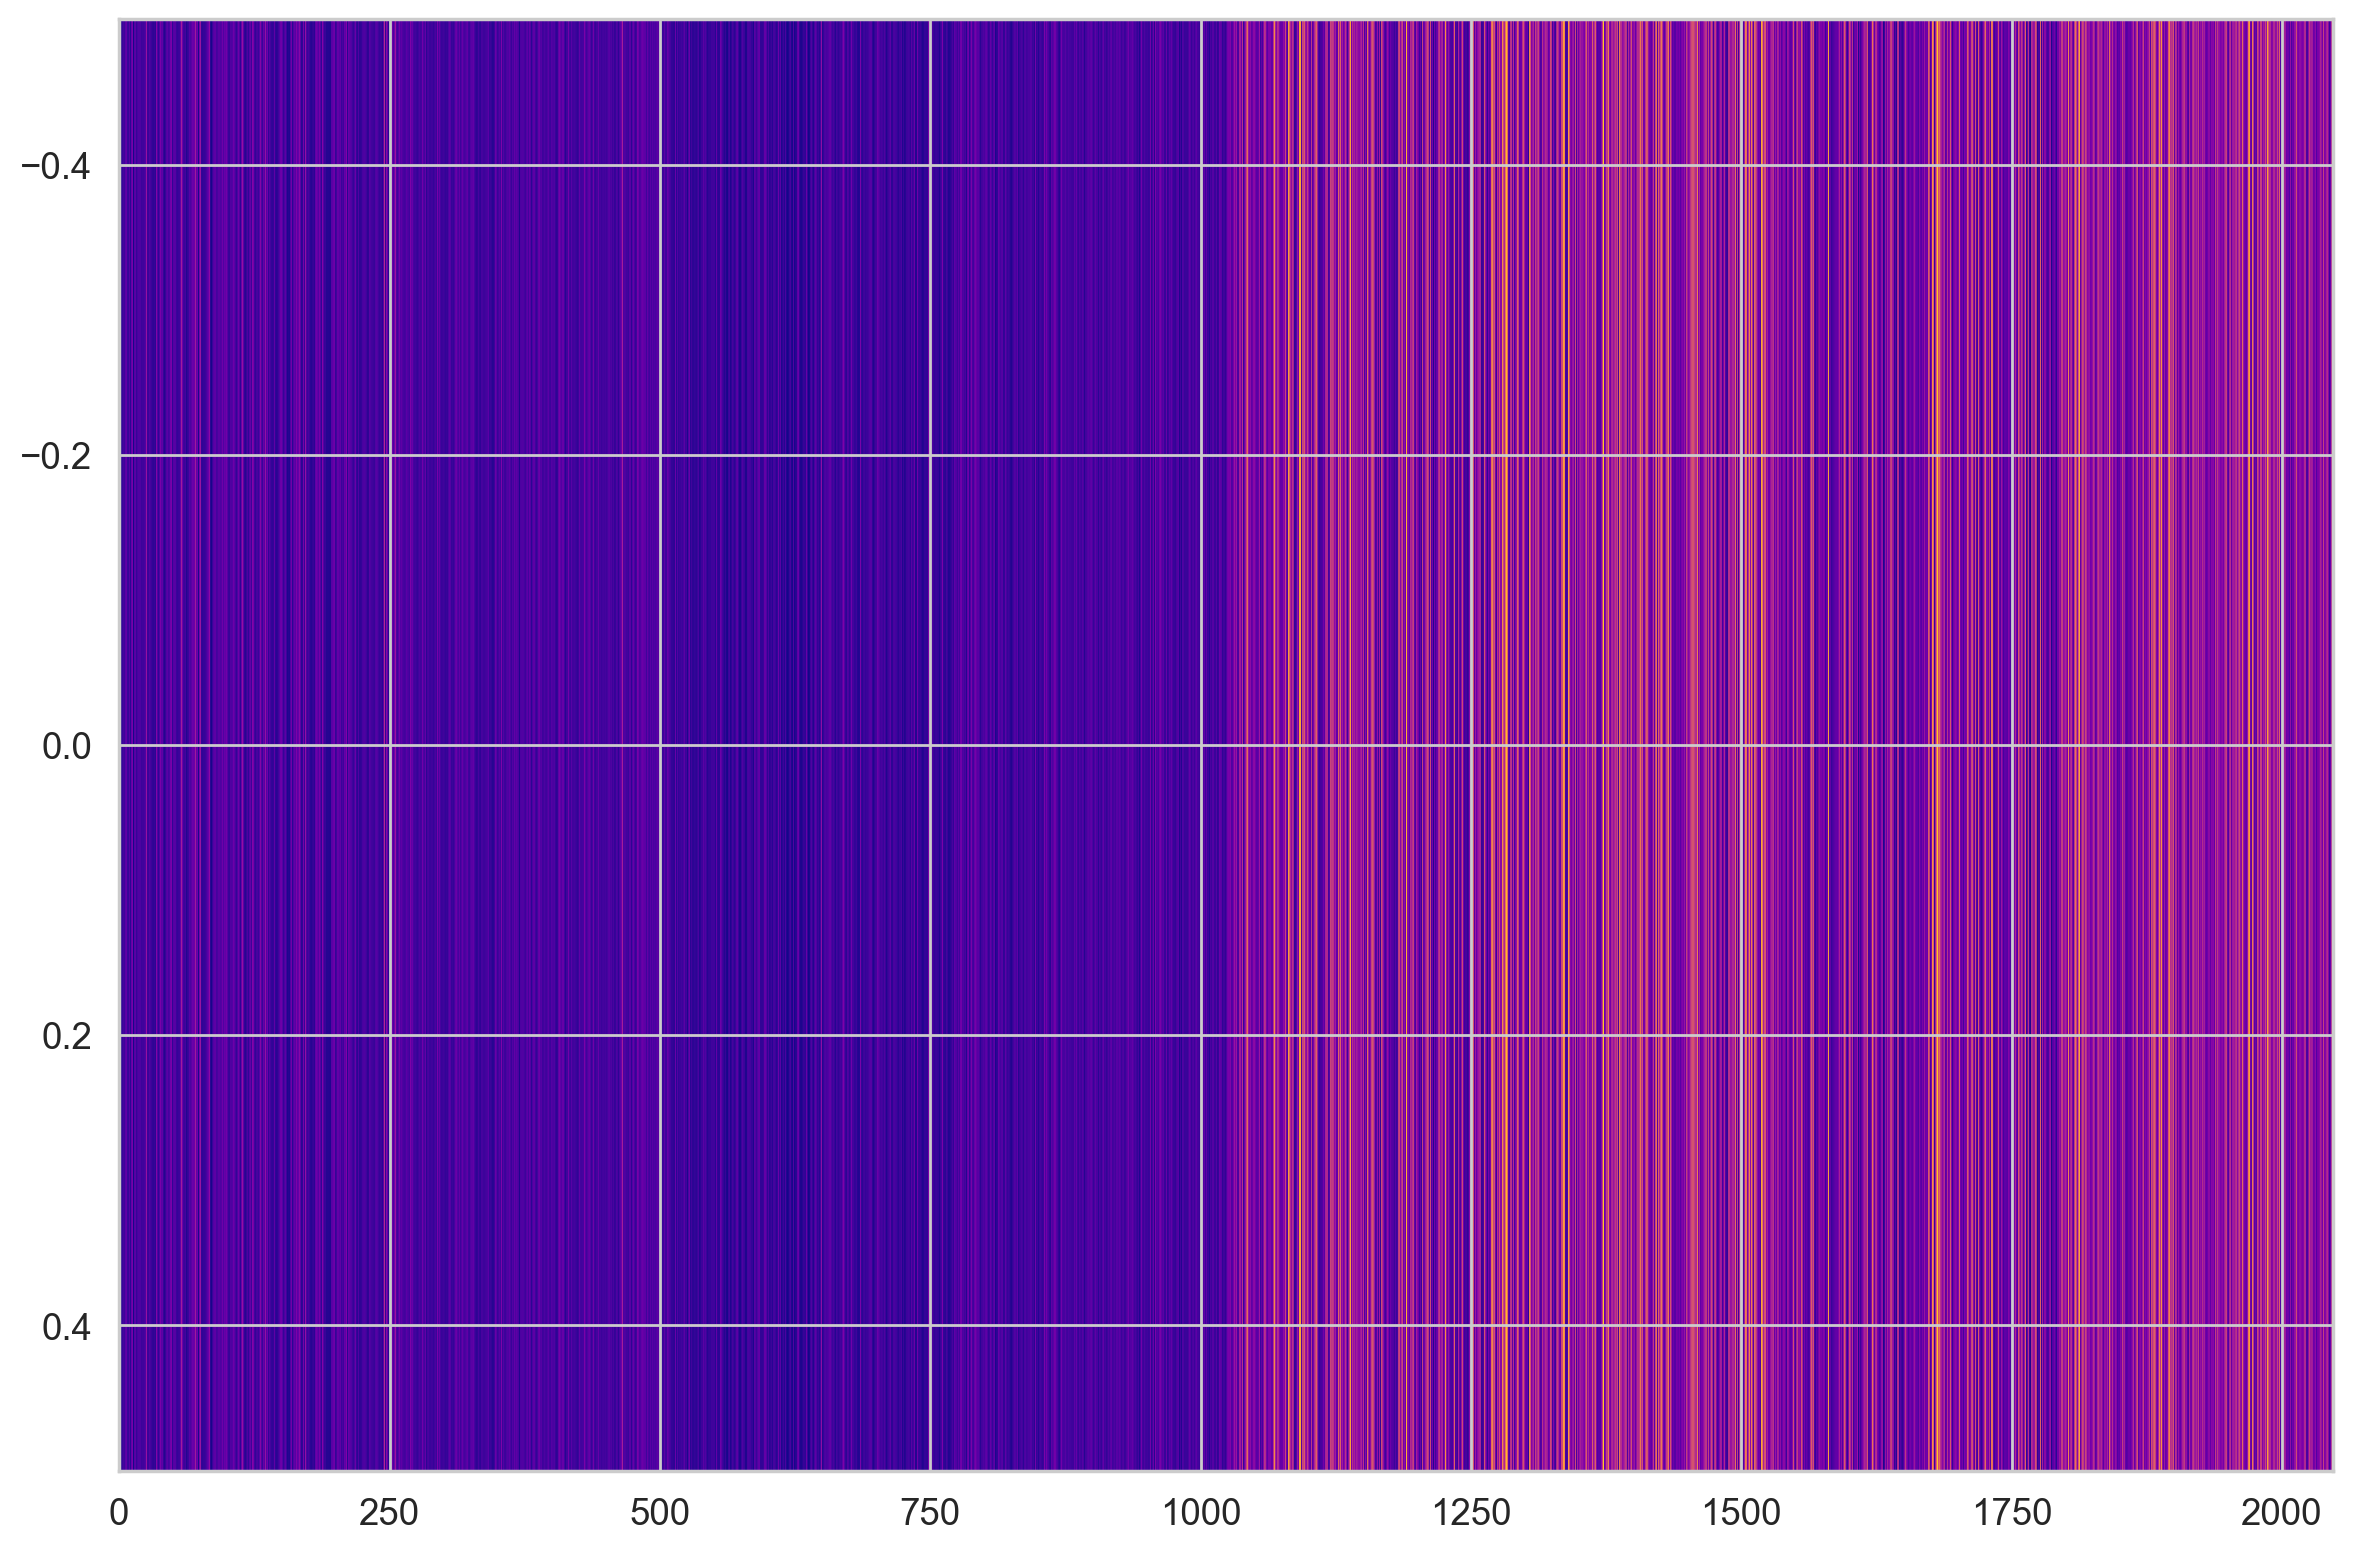

In [86]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(layer3_array[0][np.newaxis,:], cmap="plasma", aspect="auto")

plt.tight_layout()
plt.show()

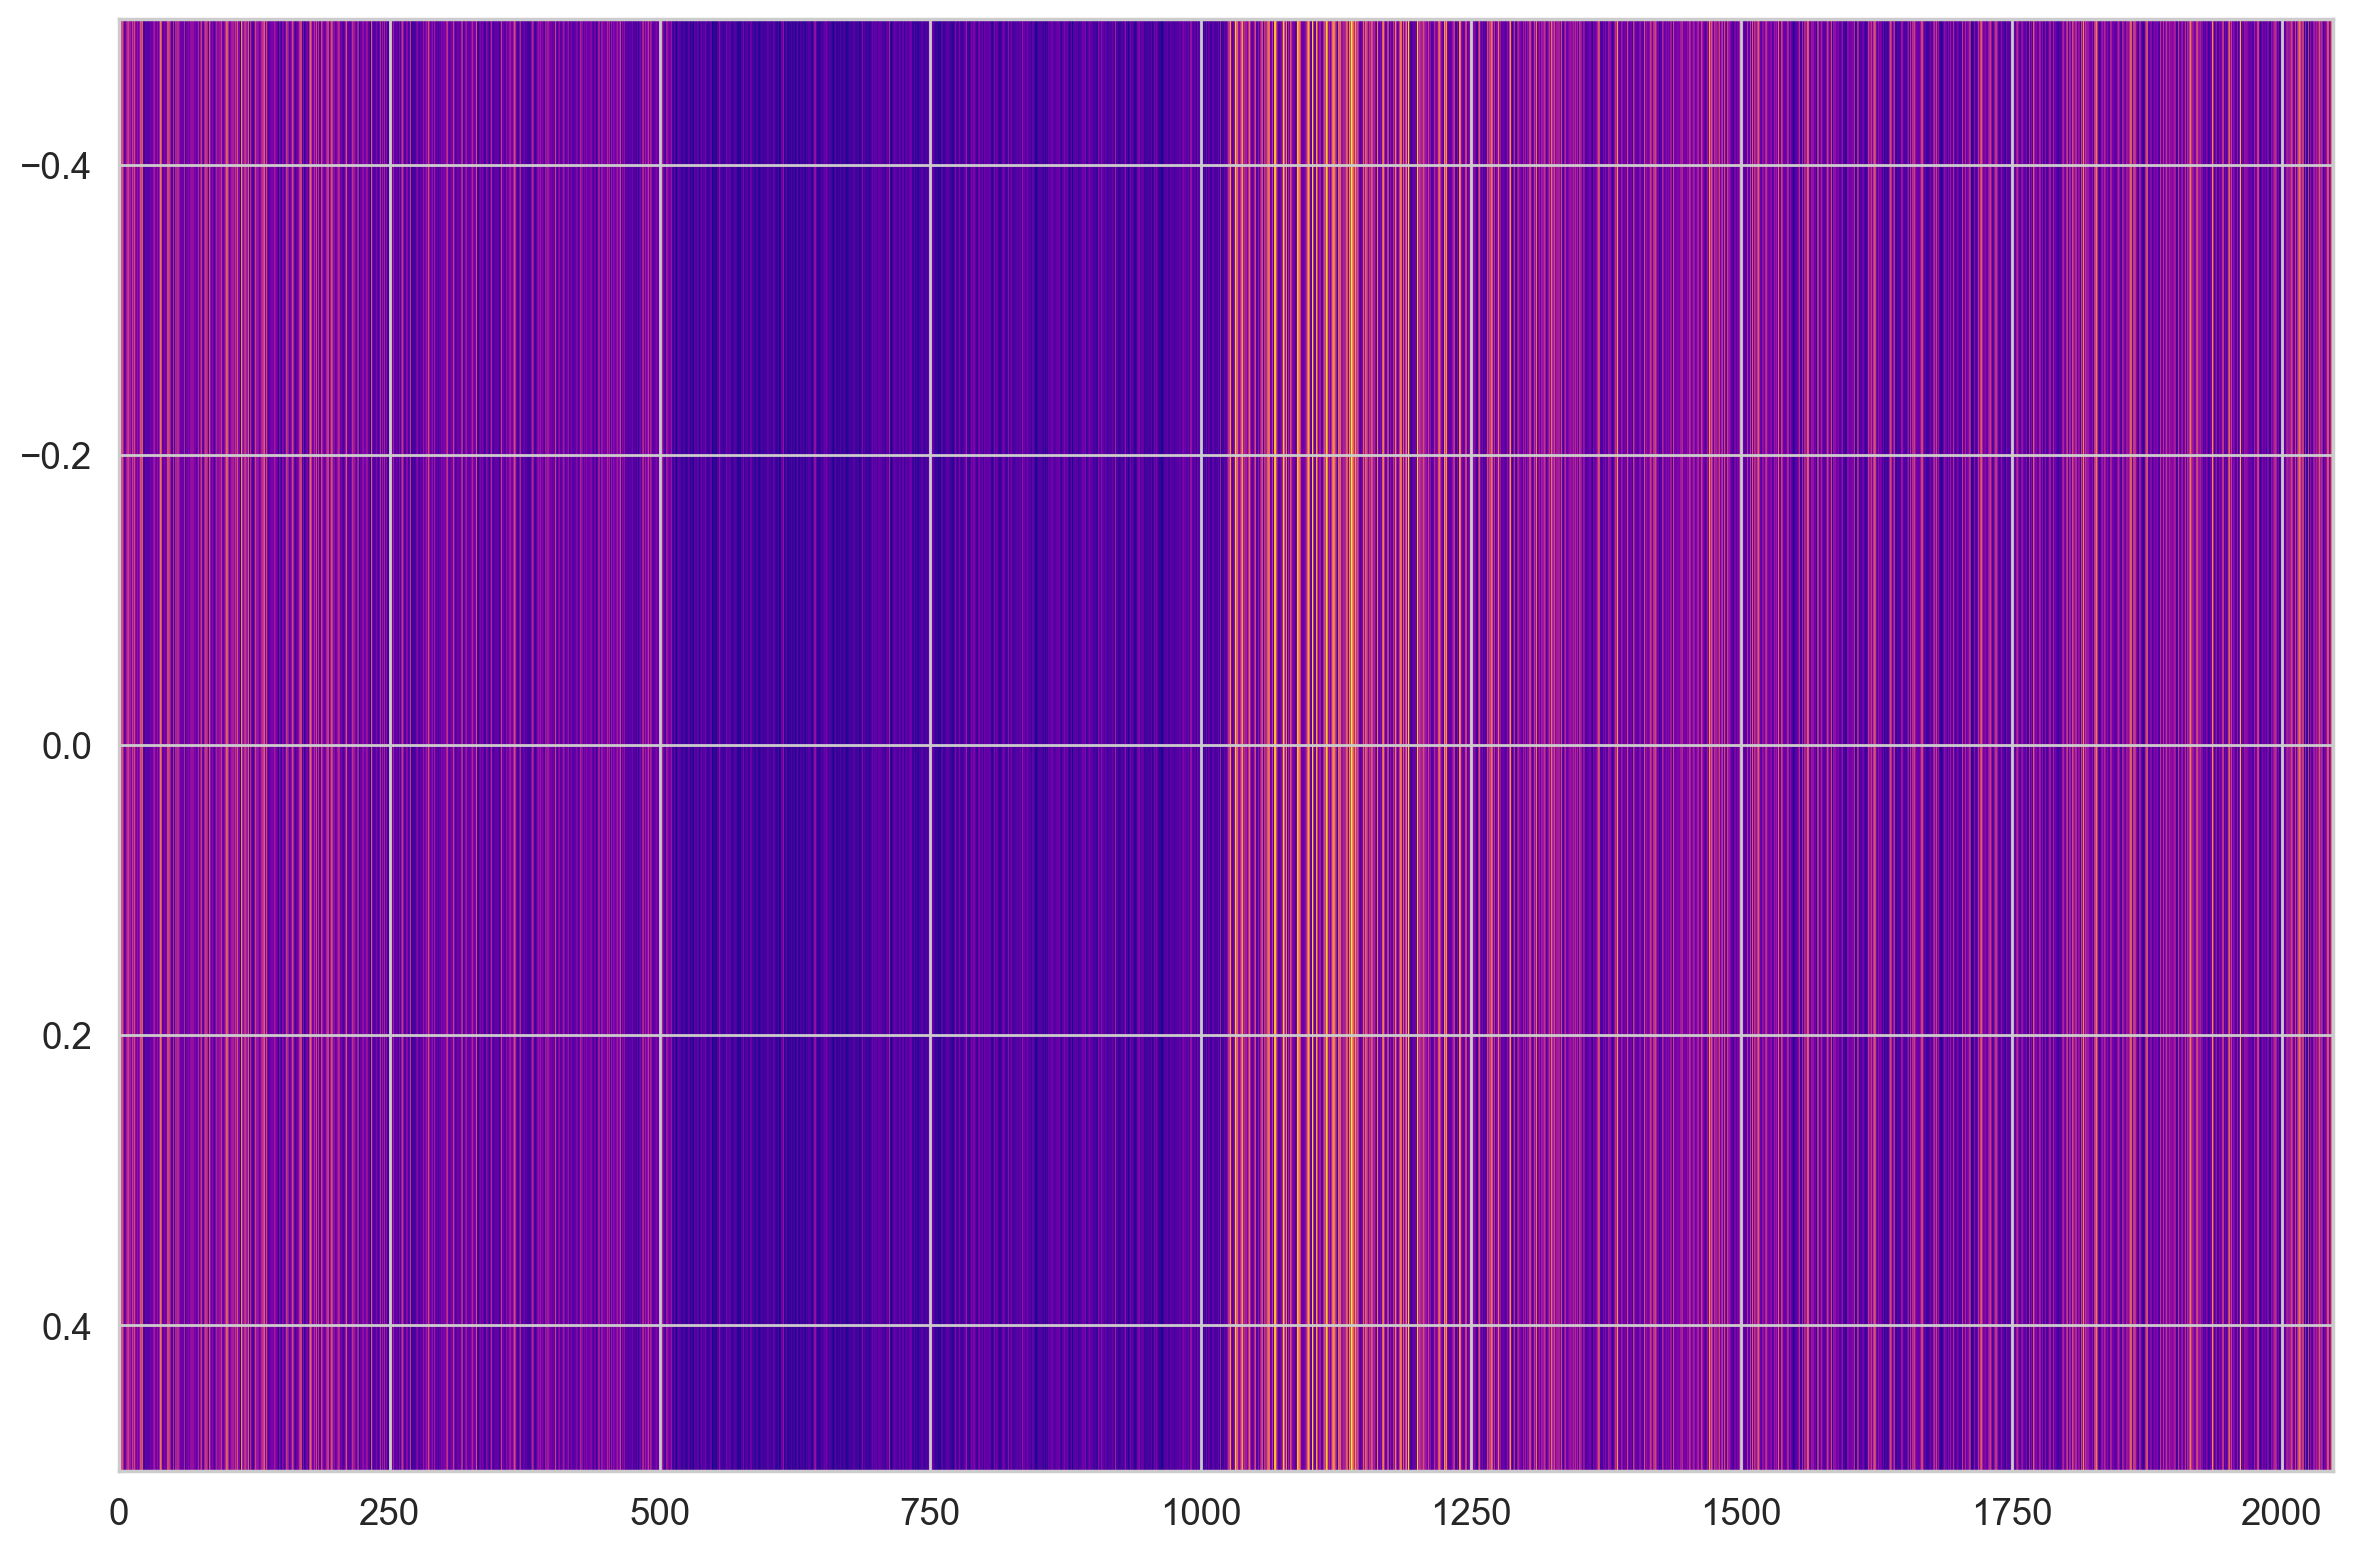

In [87]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(layer3_array[20][np.newaxis,:], cmap="plasma", aspect="auto")

plt.tight_layout()
plt.show()

### Single Array Dropout

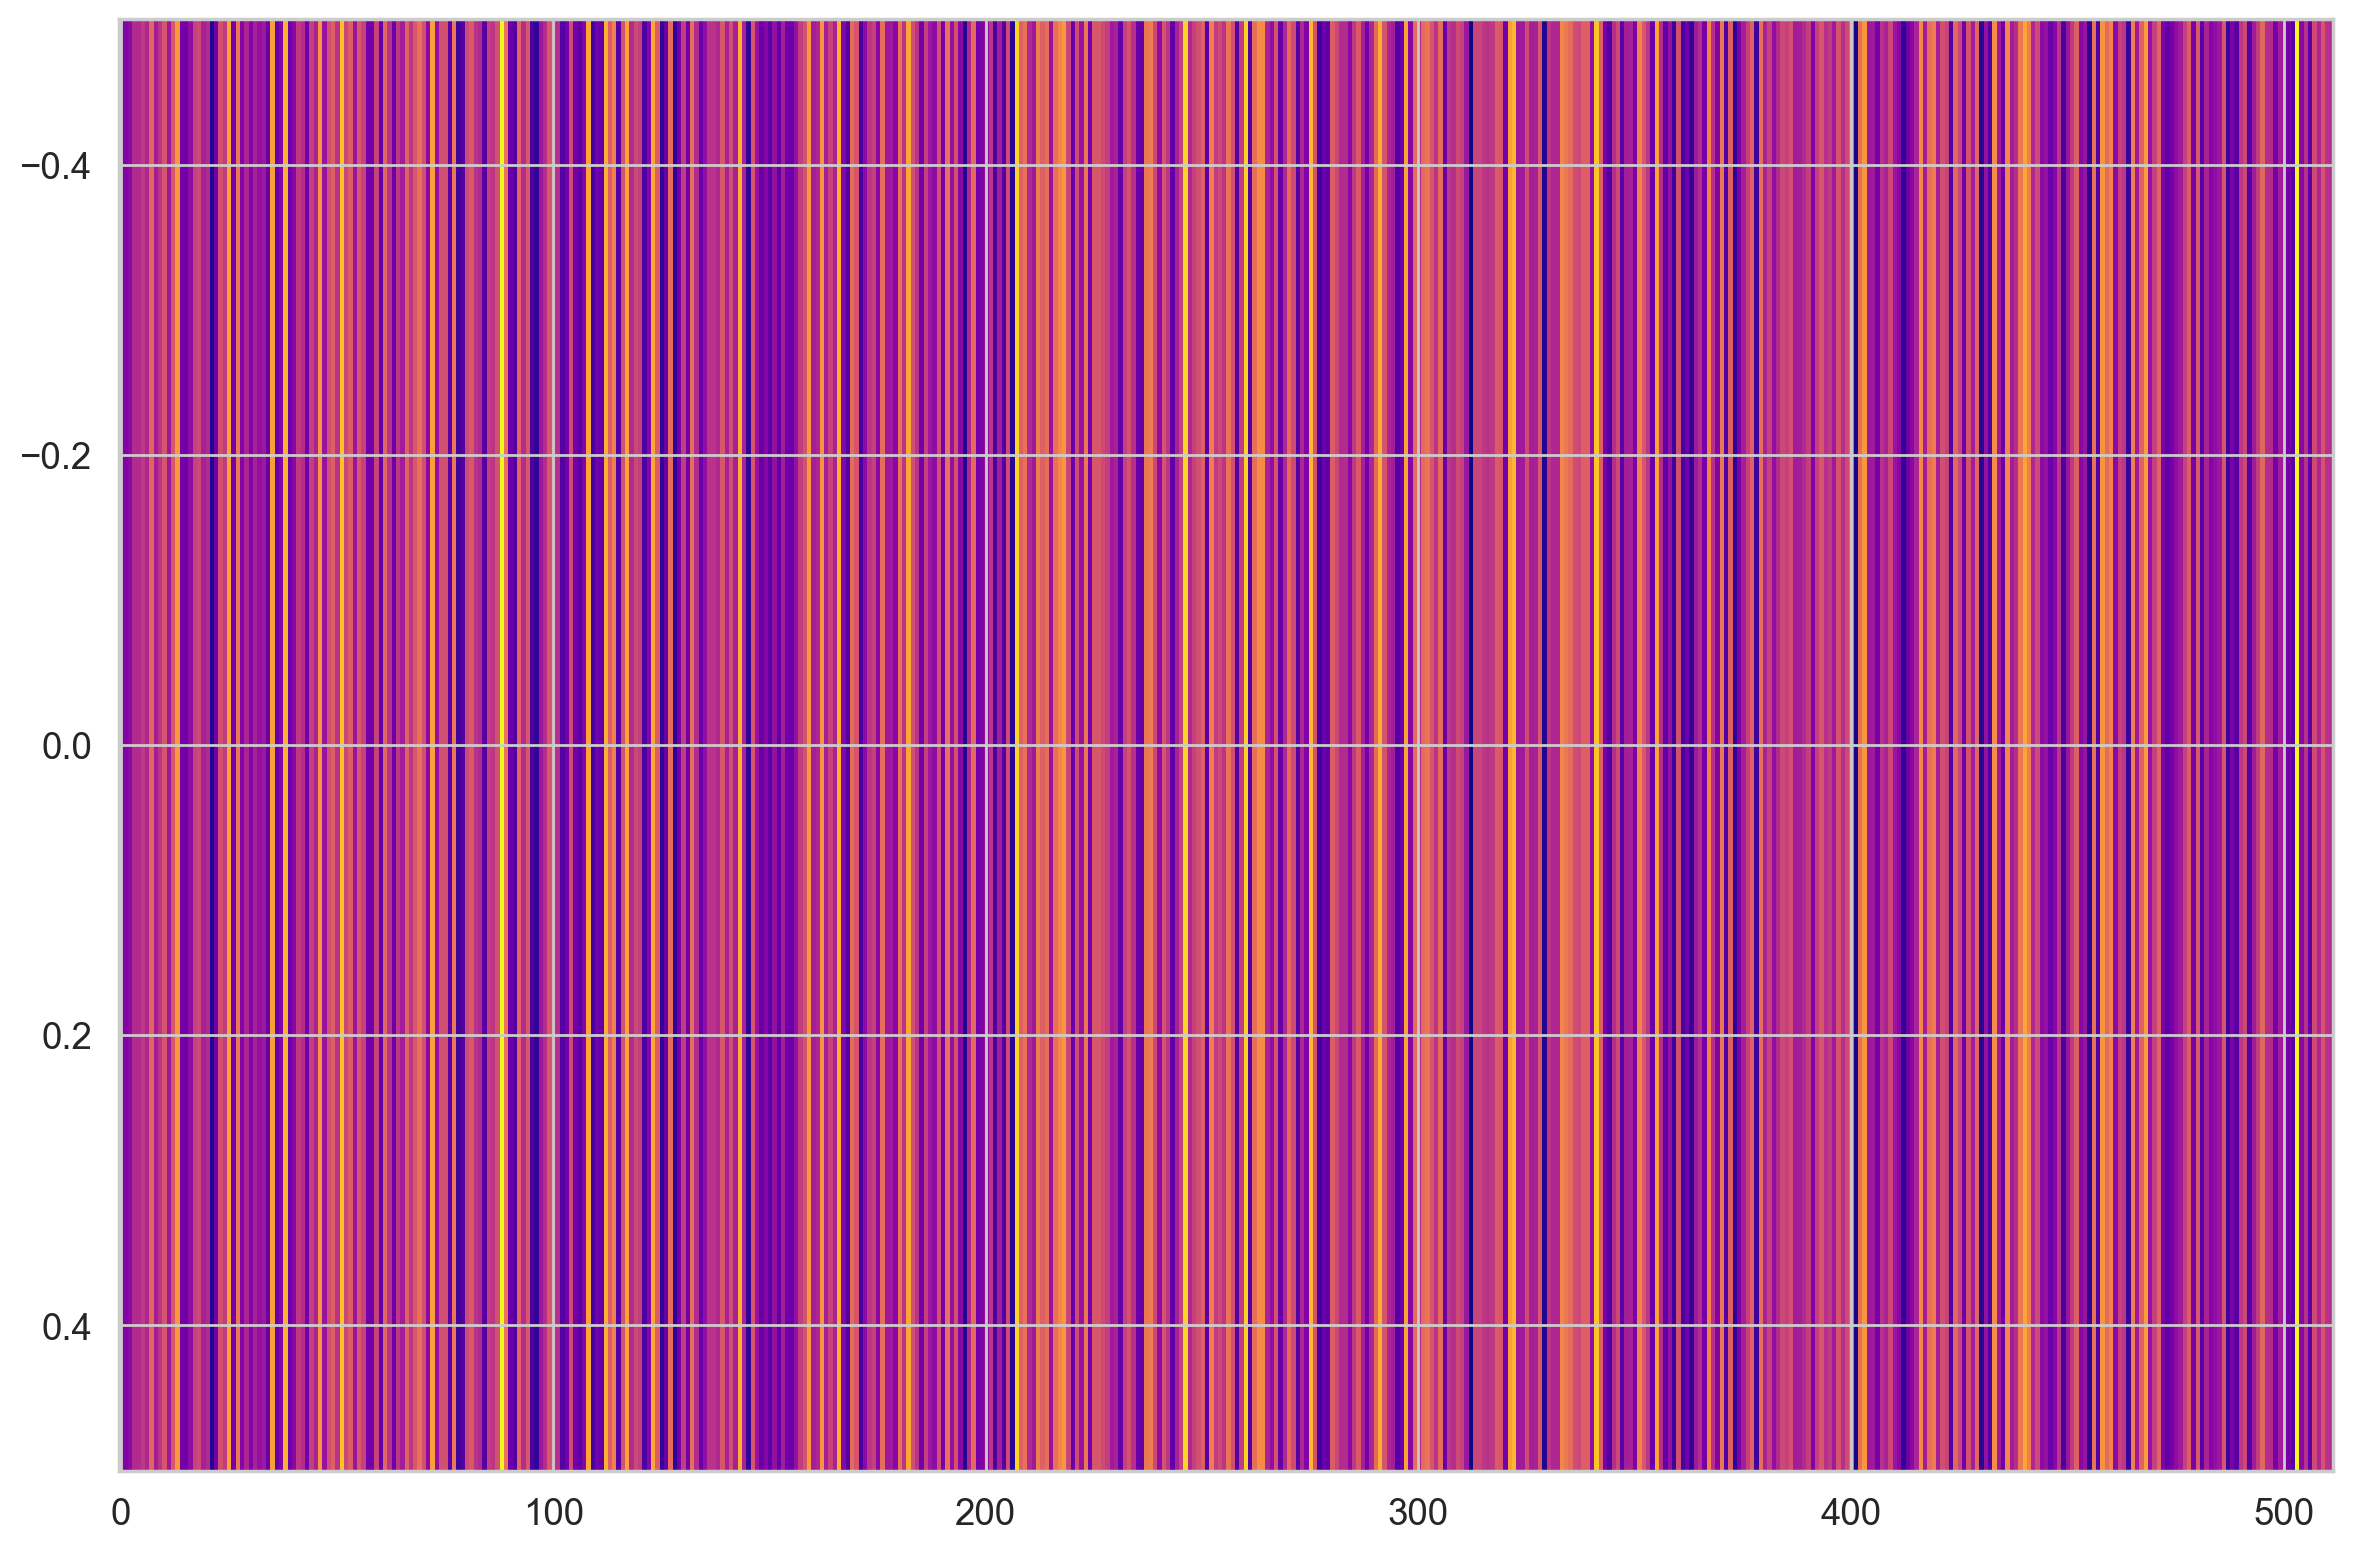

In [88]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(dropout_array[0][np.newaxis,:], cmap="plasma", aspect="auto")

plt.tight_layout()
plt.show()

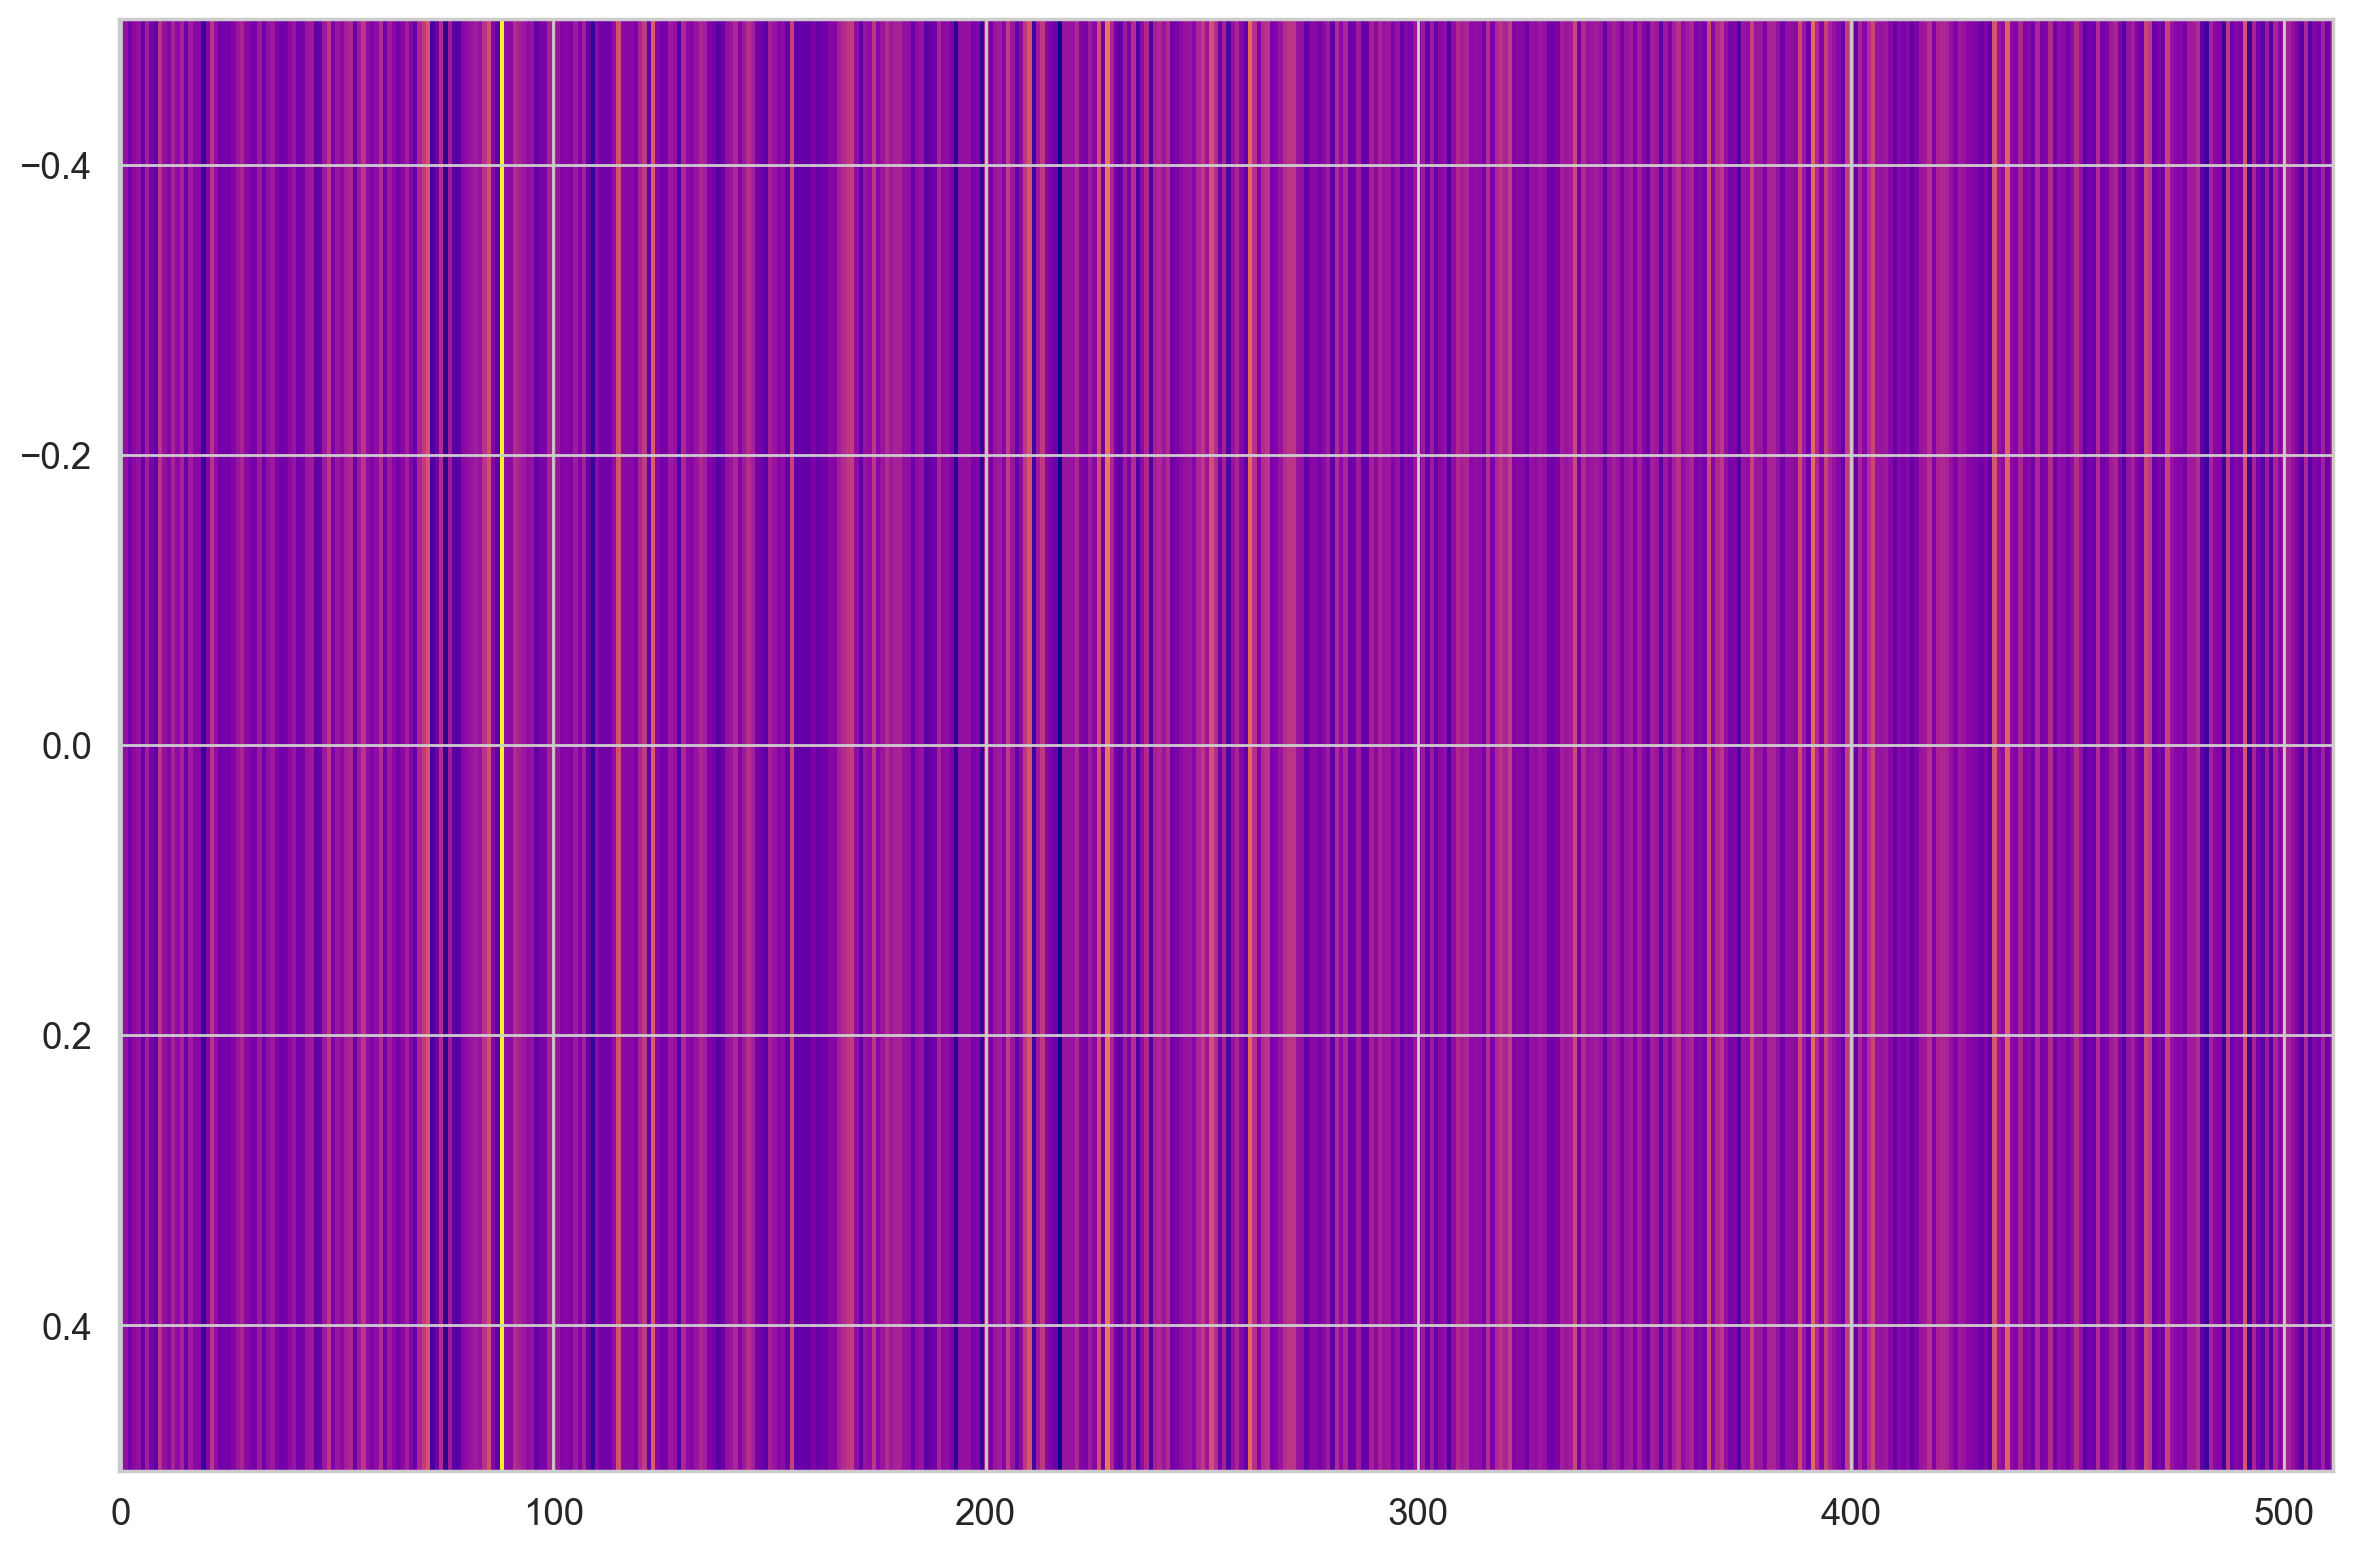

In [89]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(dropout_array[20][np.newaxis,:], cmap="plasma", aspect="auto")

plt.tight_layout()
plt.show()

### Single Output

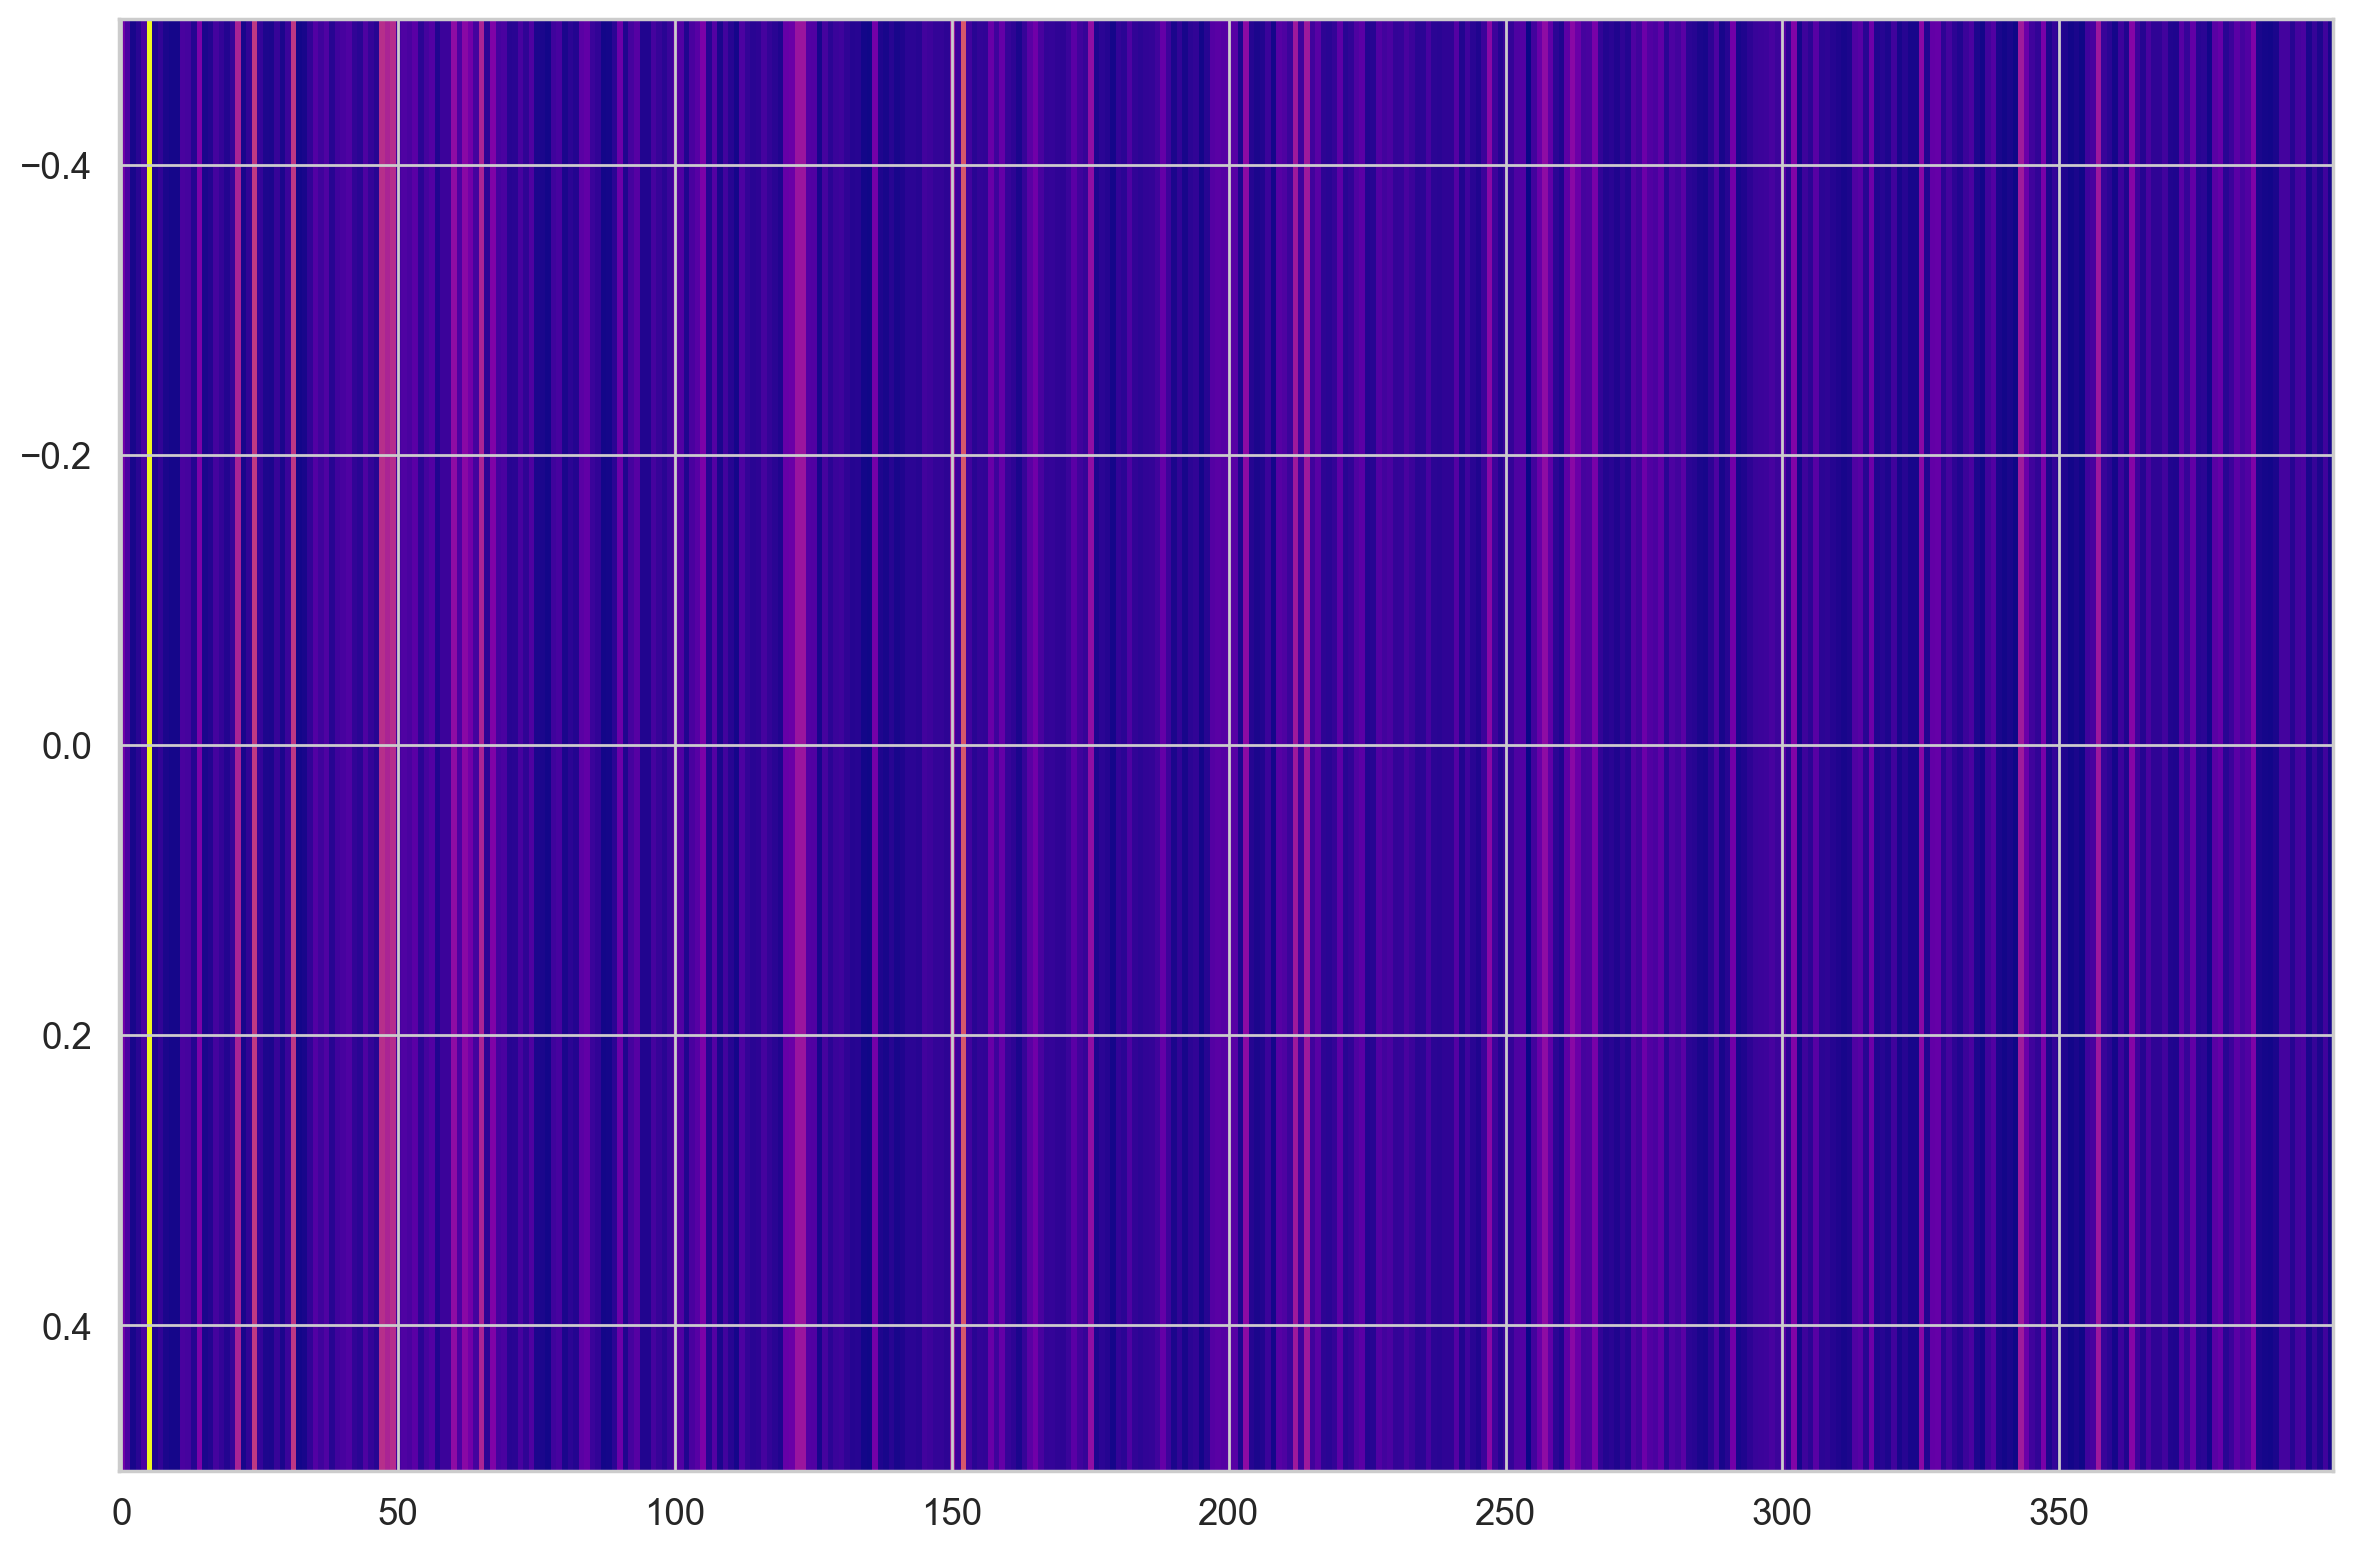

In [90]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(output_array[0][np.newaxis,:], cmap="plasma", aspect="auto")

plt.tight_layout()
plt.show()

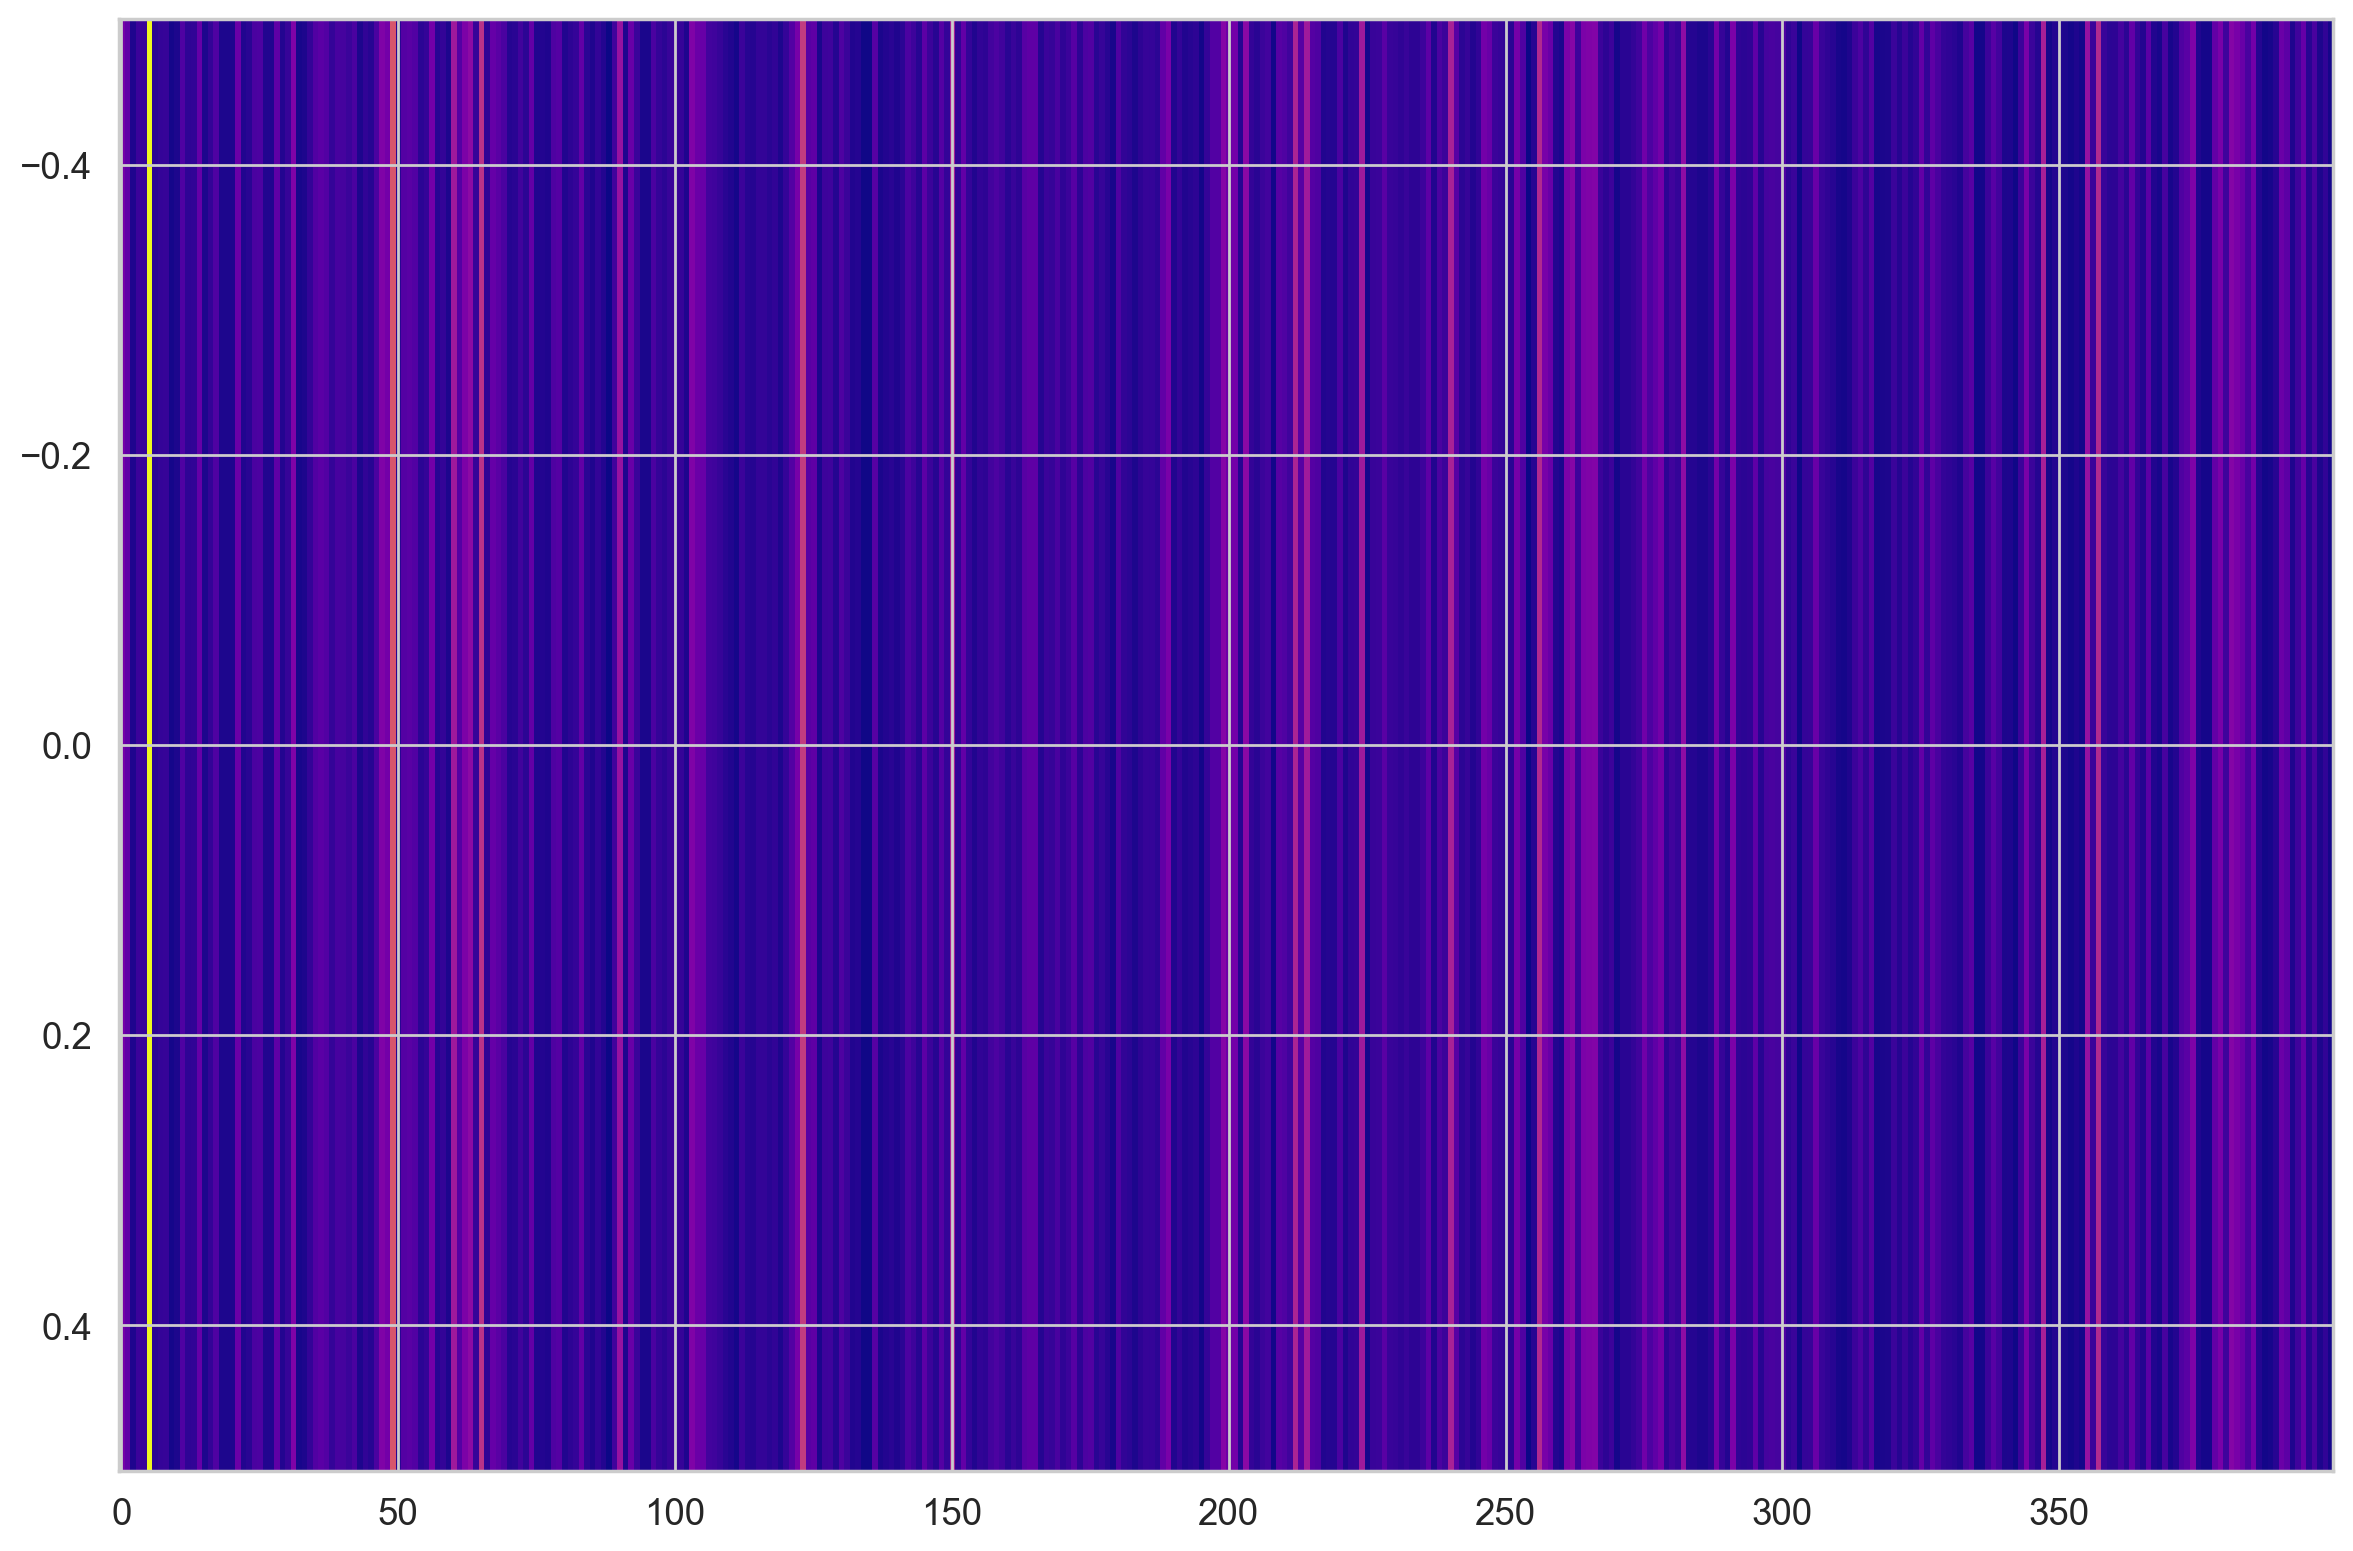

In [91]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(output_array[20][np.newaxis,:], cmap="plasma", aspect="auto")

plt.tight_layout()
plt.show()

### Umap Layer3

C:\Users\ACER\AppData\Roaming\Python\Python38\site-packages\hypertools\plot\plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


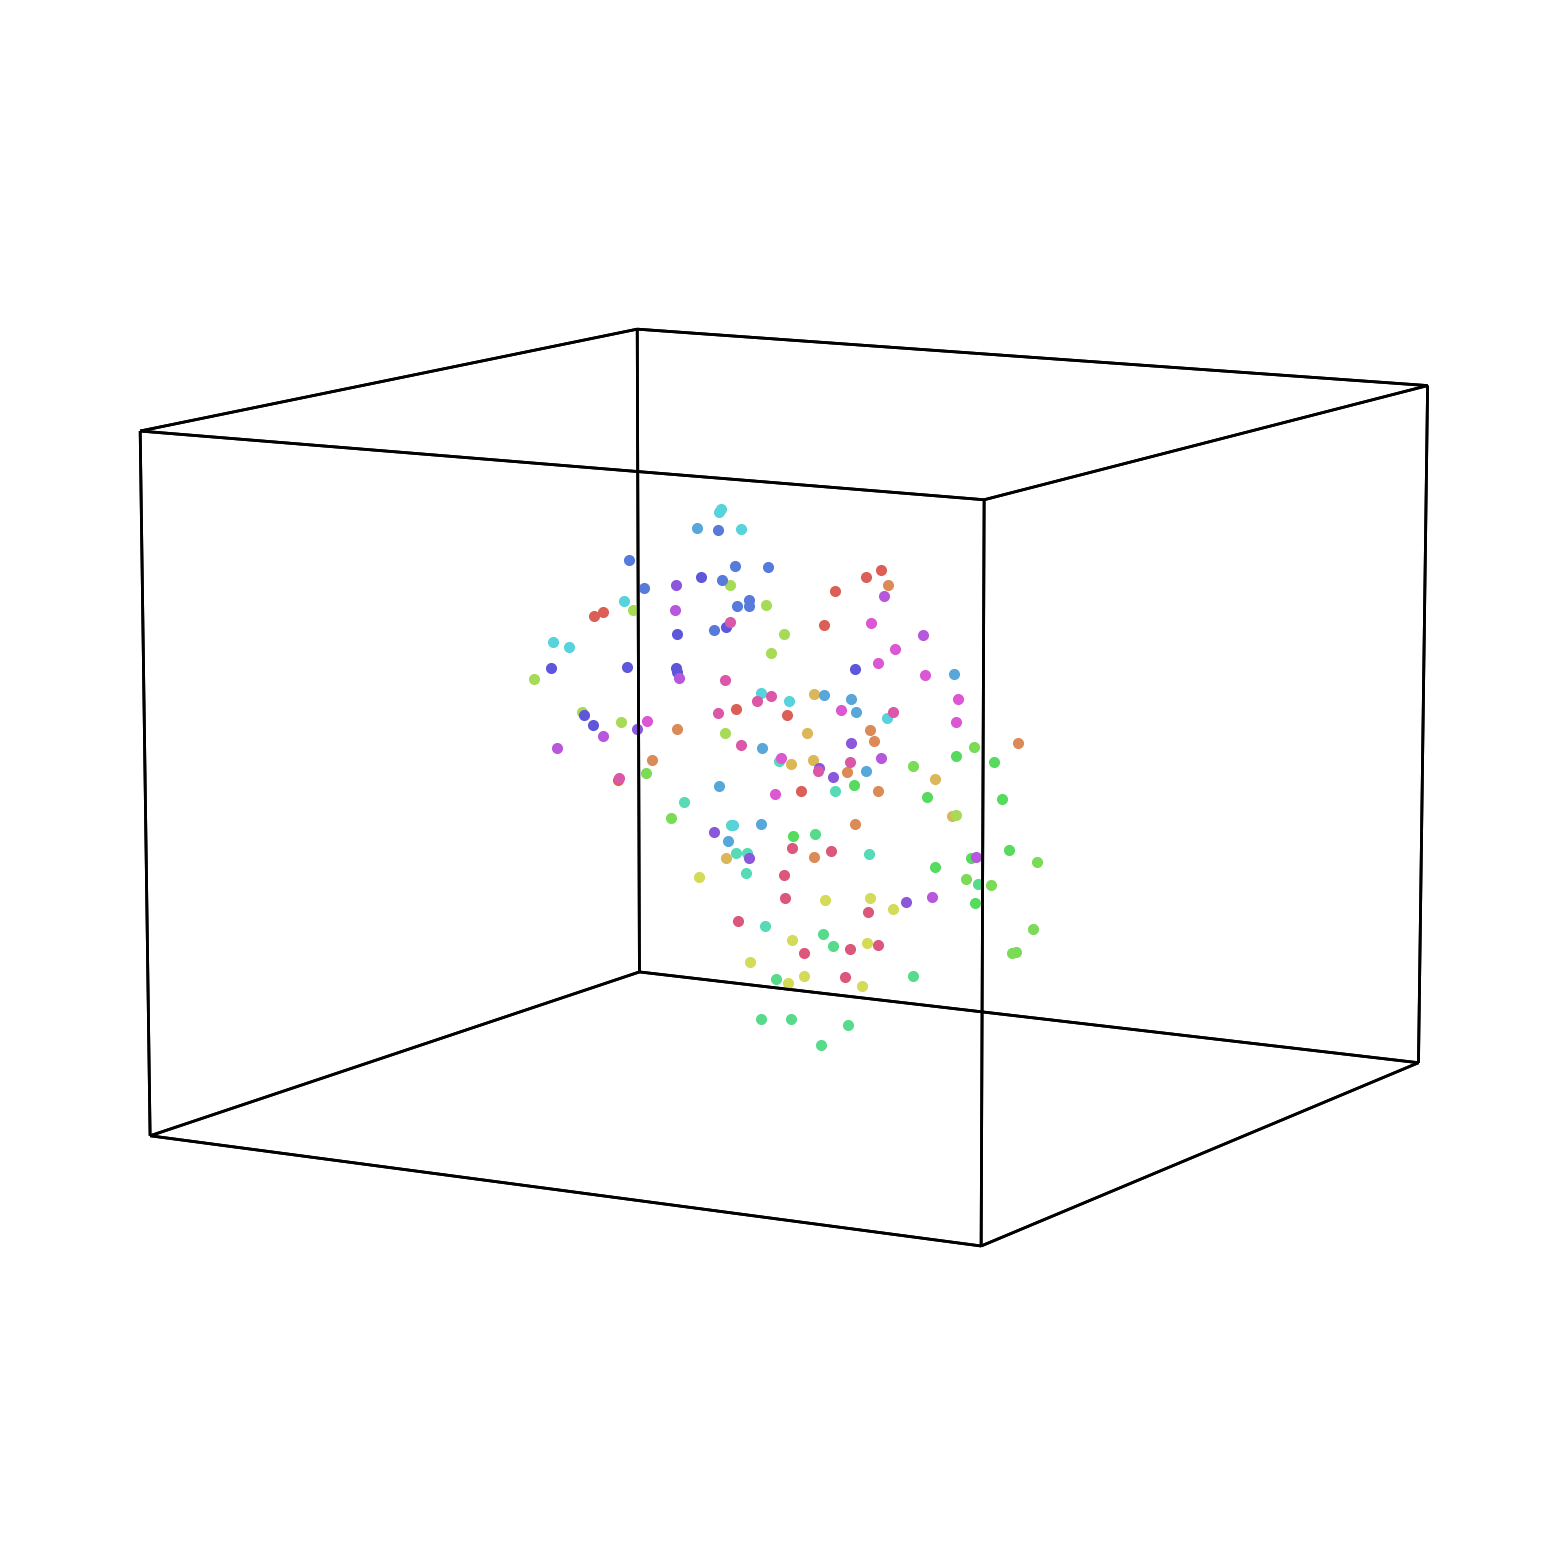

In [93]:
df = pd.DataFrame(data=layer3_array)
hyp.plot(df, '.', reduce='UMAP', hue=label_array, ndims=3)

### Umap Dropout

C:\Users\ACER\AppData\Roaming\Python\Python38\site-packages\hypertools\plot\plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


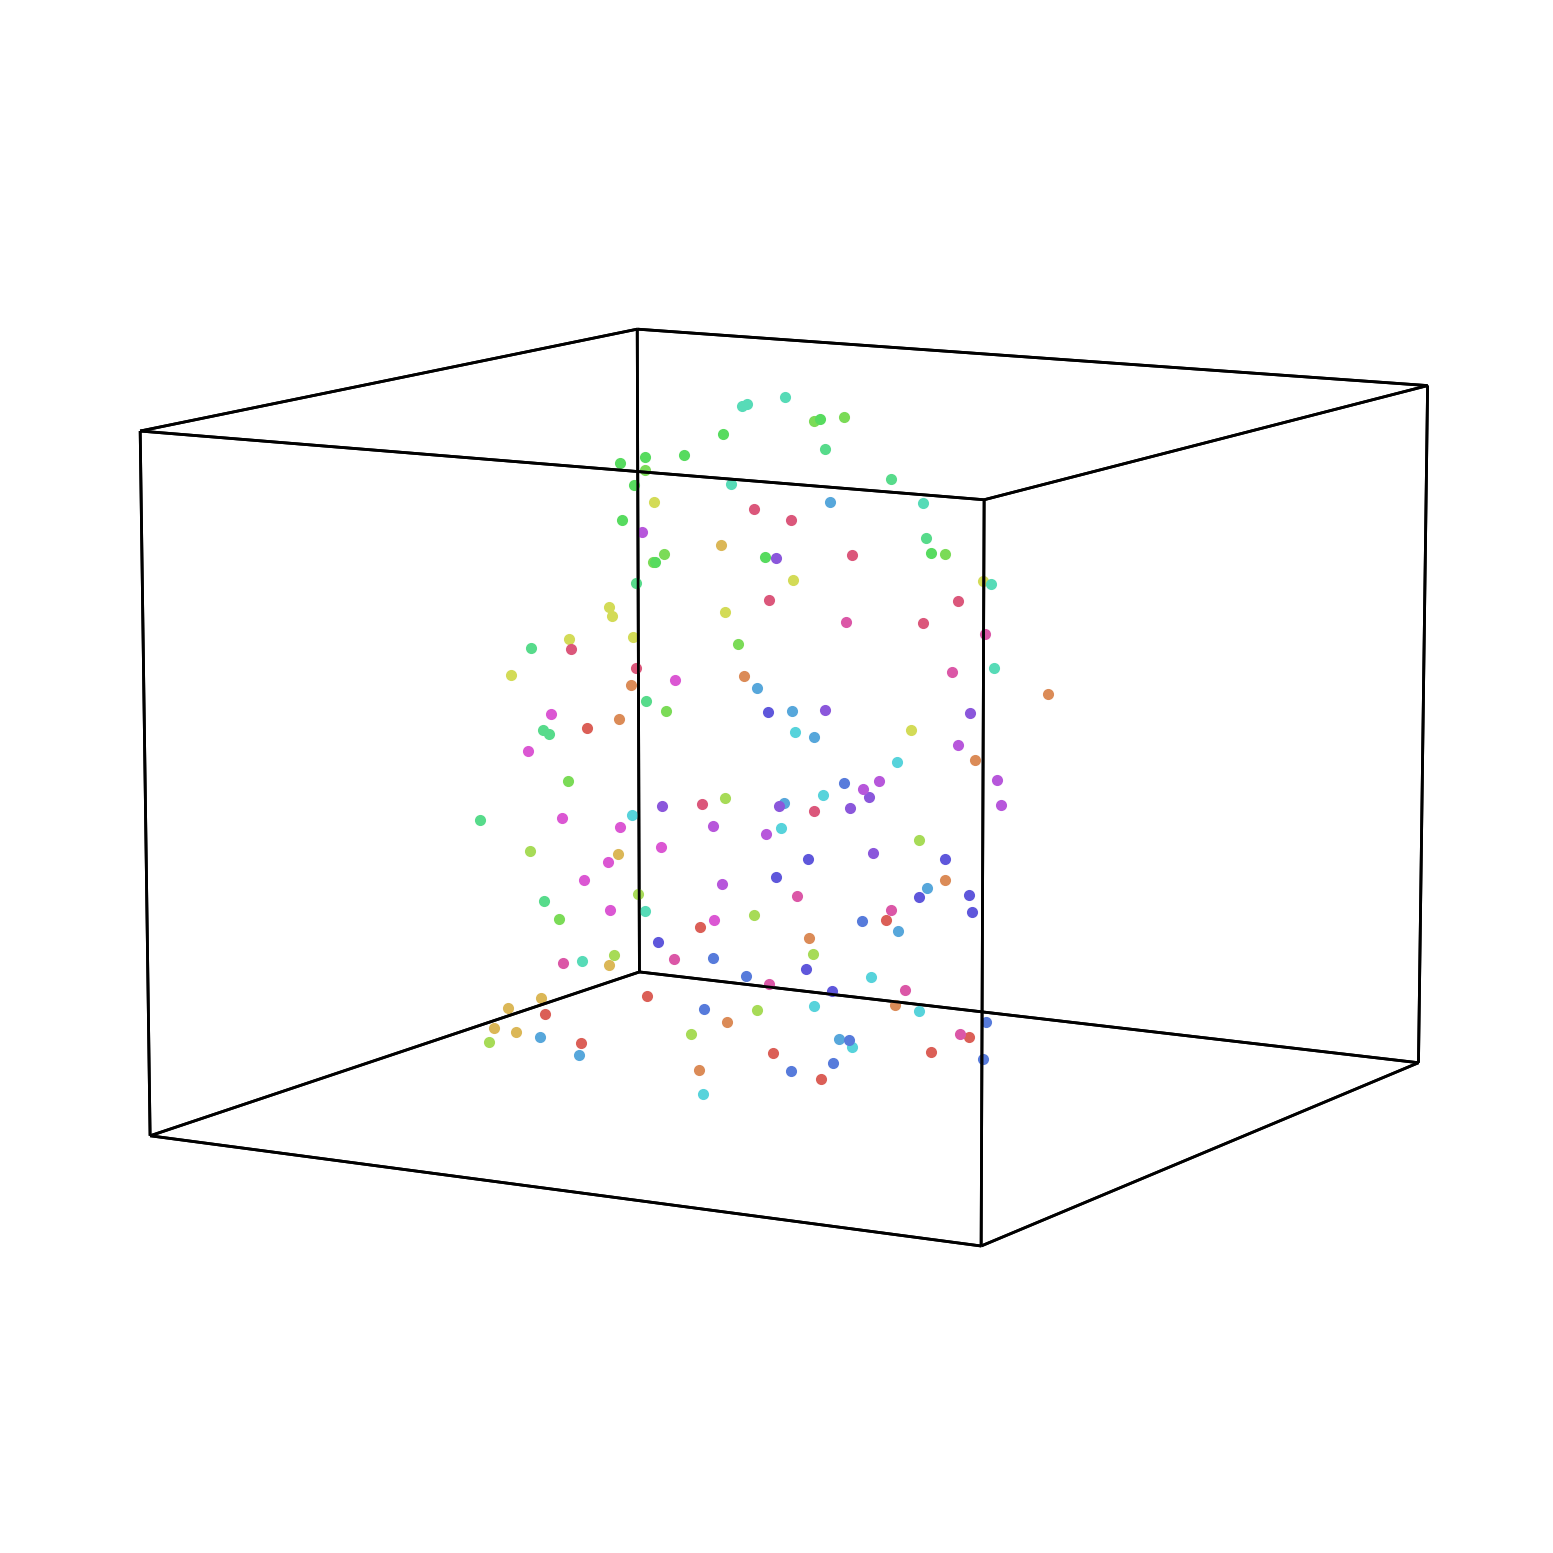

In [94]:
df = pd.DataFrame(data=dropout_array)
hyp.plot(df, '.', reduce='UMAP', hue=label_array, ndims=3)

### Umap Output

C:\Users\ACER\AppData\Roaming\Python\Python38\site-packages\hypertools\plot\plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


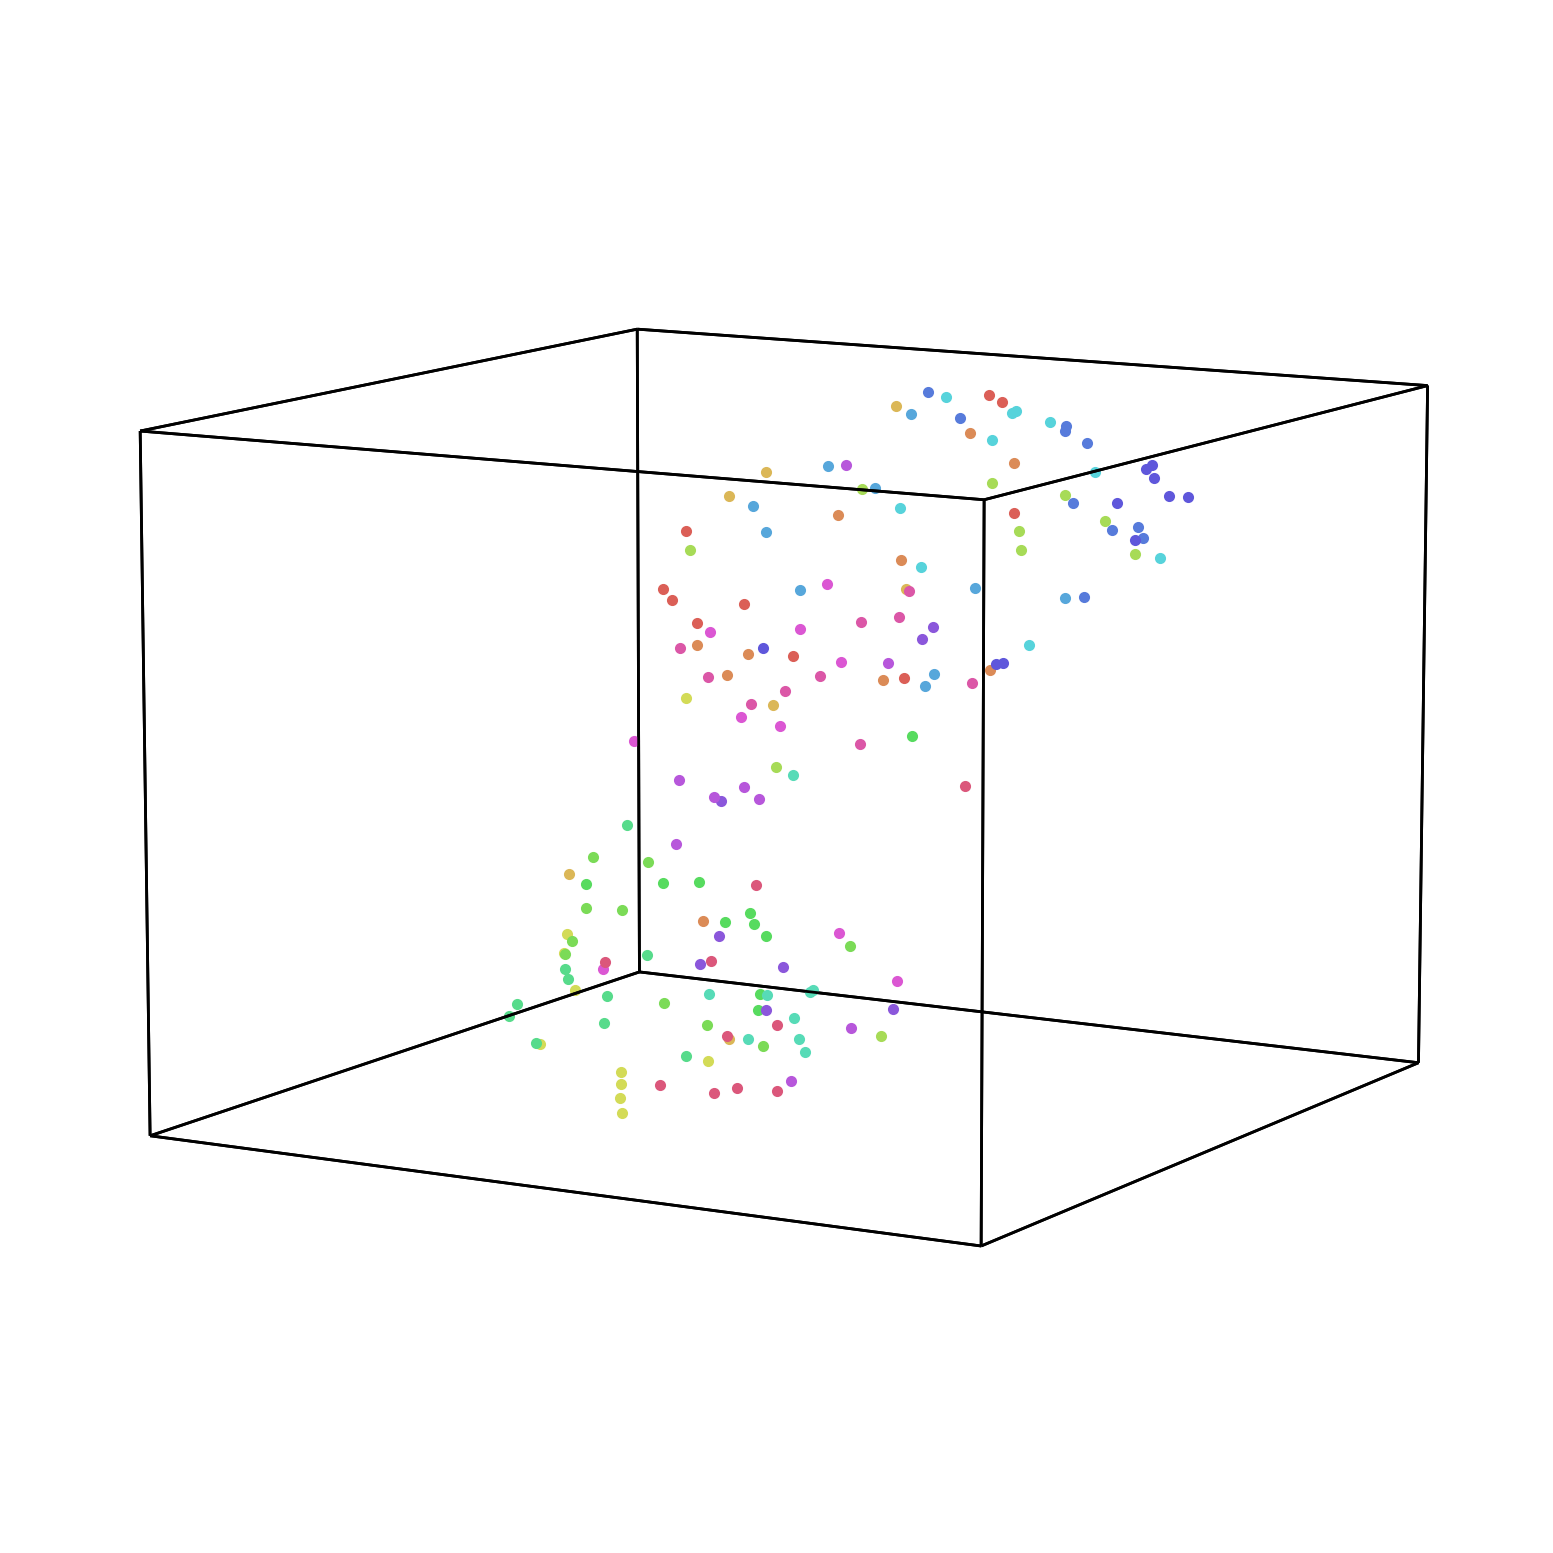

In [95]:
df = pd.DataFrame(data=output_array)
hyp.plot(df, '.', reduce='UMAP', hue=label_array, ndims=3)

In [ ]:
"E:/FYP_Data/Pose3D/extracted_feat.npz"

In [97]:
output_prototypes = {}
for k in np.unique(label_array):
    output_prototypes[k] = np.mean(output_array[label_array == k],axis=0)

In [98]:
layer3_prototypes = {}
for k in np.unique(label_array):
    output_prototypes[k] = np.mean(layer3_array[label_array == k],axis=0)

In [99]:
dropout_prototypes = {}
for k in np.unique(label_array):
    output_prototypes[k] = np.mean(dropout_array[label_array == k],axis=0)

In [100]:
with open(f"E:/FYP_Data/Pose3D/output_prototypes.pkl","wb") as f0:
    pickle.dump(output_prototypes,f0)

with open(f"E:/FYP_Data/Pose3D/layer3_prototypes.pkl","wb") as f0:
    pickle.dump(layer3_prototypes,f0)

with open(f"E:/FYP_Data/Pose3D/dropout_prototypes.pkl","wb") as f0:
    pickle.dump(dropout_prototypes,f0)